# DESCRIPTIVE ANALYTICS AND LINEAR REGRESSION

In [1]:
import pandas as pd
import numpy as np
import matplotlib; from matplotlib import pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


# DATA CLEANING

In [2]:
fdata = pd.read_csv('nycflights.csv', index_col = 0)
fdata

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336772,2013,9,30,NaN,NaN,NaN,NaN,9E,NaN,3393,JFK,DCA,NaN,213,NaN,NaN
336773,2013,9,30,NaN,NaN,NaN,NaN,9E,NaN,3525,LGA,SYR,NaN,198,NaN,NaN
336774,2013,9,30,NaN,NaN,NaN,NaN,MQ,N535MQ,3461,LGA,BNA,NaN,764,NaN,NaN
336775,2013,9,30,NaN,NaN,NaN,NaN,MQ,N511MQ,3572,LGA,CLE,NaN,419,NaN,NaN


In [3]:
fdata.isna().sum()

year            0
month           0
day             0
dep_time     8255
dep_delay    8255
arr_time     8713
arr_delay    9430
carrier         0
tailnum      2512
flight          0
origin          0
dest            0
air_time     9430
distance        0
hour         8255
minute       8255
dtype: int64

In [4]:
fdata[fdata.isnull().any(axis = 1)]

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
472,2013,1,1,1525.0,-5.0,1934.0,NaN,MQ,N719MQ,4525,LGA,XNA,NaN,1147,15.0,25.0
478,2013,1,1,1528.0,29.0,2002.0,NaN,EV,N17108,3806,EWR,STL,NaN,872,15.0,28.0
616,2013,1,1,1740.0,-5.0,2158.0,NaN,MQ,N739MQ,4413,LGA,XNA,NaN,1147,17.0,40.0
644,2013,1,1,1807.0,29.0,2251.0,NaN,UA,N31412,1228,EWR,SAN,NaN,2425,18.0,7.0
726,2013,1,1,1939.0,59.0,29.0,NaN,9E,N905XJ,3325,JFK,DFW,NaN,1391,19.0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336772,2013,9,30,NaN,NaN,NaN,NaN,9E,NaN,3393,JFK,DCA,NaN,213,NaN,NaN
336773,2013,9,30,NaN,NaN,NaN,NaN,9E,NaN,3525,LGA,SYR,NaN,198,NaN,NaN
336774,2013,9,30,NaN,NaN,NaN,NaN,MQ,N535MQ,3461,LGA,BNA,NaN,764,NaN,NaN
336775,2013,9,30,NaN,NaN,NaN,NaN,MQ,N511MQ,3572,LGA,CLE,NaN,419,NaN,NaN


In [5]:
fdata.dropna(inplace = True, axis = 0, how = 'any')

In [6]:
# Bỏ dữ liệu null

In [7]:
fdata.isna().any(axis = 0)

year         False
month        False
day          False
dep_time     False
dep_delay    False
arr_time     False
arr_delay    False
carrier      False
tailnum      False
flight       False
origin       False
dest         False
air_time     False
distance     False
hour         False
minute       False
dtype: bool

In [8]:
#Kiểm tra duplicates
fdata[fdata.duplicated(keep = False)]

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute


In [9]:
fdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327346 entries, 1 to 336770
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       327346 non-null  int64  
 1   month      327346 non-null  int64  
 2   day        327346 non-null  int64  
 3   dep_time   327346 non-null  float64
 4   dep_delay  327346 non-null  float64
 5   arr_time   327346 non-null  float64
 6   arr_delay  327346 non-null  float64
 7   carrier    327346 non-null  object 
 8   tailnum    327346 non-null  object 
 9   flight     327346 non-null  int64  
 10  origin     327346 non-null  object 
 11  dest       327346 non-null  object 
 12  air_time   327346 non-null  float64
 13  distance   327346 non-null  int64  
 14  hour       327346 non-null  float64
 15  minute     327346 non-null  float64
dtypes: float64(7), int64(5), object(4)
memory usage: 42.5+ MB


In [10]:
fdata.reset_index(inplace = True, drop = True)

# Phân tích mô tả cho cột dep_delay

In [11]:
fdata.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0


In [12]:
dep_delay = fdata['dep_delay'].values
origin = fdata['origin'].values
air_time = fdata['air_time'].values
arr_delay = fdata['arr_delay'].values
distance = fdata['distance'].values
arr_time = fdata['arr_time'].values

In [13]:
# Tứ phân vị
q1 = np.quantile(dep_delay, 0.25)
q2 =  np.quantile(dep_delay, 0.5)
q3 =  np.quantile(dep_delay, 0.75)
iqr = q3 - q1
lowerquartile = q1 - 1.5 * iqr
upperquartile = q3 + 1.5 * iqr

In [14]:
# Độ đo về sự mở rộng
mean = np.mean(dep_delay)
median = np.median(dep_delay)
min = np.min(dep_delay)
max = np.max(dep_delay)
ptp = np.ptp(dep_delay)
var = np.var(dep_delay)
std = np.std(dep_delay)
unique = len(np.unique(dep_delay))
count = len(dep_delay)
print(f'mean: {mean}')
print(f'median: {median}')
print(f'min: {min}')
print(f'max: {max}')
print(f'ptp: {ptp}')
print(f'var: {var}')
print(f'std: {std}')
print(f'unique: {unique}')
print(f'count: {count}')

mean: 12.555155706805643
median: -2.0
min: -43.0
max: 1301.0
ptp: 1344.0
var: 1605.2544178444628
std: 40.06562638777113
unique: 526
count: 327346


In [15]:
np.unique(origin, return_counts = True)

(array(['EWR', 'JFK', 'LGA'], dtype=object),
 array([117127, 109079, 101140], dtype=int64))

In [16]:
dep_delay_EWR = dep_delay[origin == 'EWR']
dep_delay_JFK = dep_delay[origin == 'JFK']
dep_delay_LGA = dep_delay[origin == 'LGA']
total_EWR = dep_delay_EWR.sum()
total_JFK = dep_delay_JFK.sum()
total_LGA = dep_delay_LGA.sum()

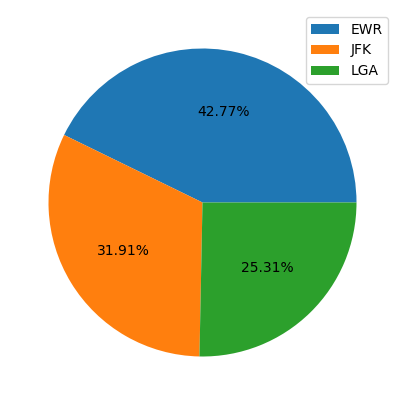

In [17]:
plt.figure(figsize = [5,5])
plt.pie([total_EWR, total_JFK, total_LGA], autopct = '%.2f%%')
plt.legend(list(np.unique(origin)))

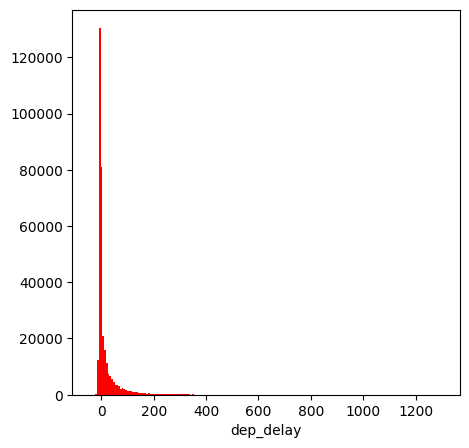

In [18]:
# Khuynh hướng tập trung
fig, ax = plt.subplots(figsize = [5,5])
ax.hist(dep_delay, bins = 200, color = 'r')
ax.set_xlabel('dep_delay')
plt.show()

Vì ptp là 1344.0 trong khi mean và median lần lượt là 12.55 và -2.0 nên sẽ loại bỏ outlier trước khi vẽ biểu đồ

In [19]:
# Outlier
print(dep_delay[(dep_delay < lowerquartile)])
print(dep_delay[(dep_delay > upperquartile)])

[-30. -32. -43. -33.]
[ 47.  39. 101. ...  72.  80. 154.]


In [20]:
dep_delay_new = dep_delay[(dep_delay > lowerquartile) & (dep_delay < upperquartile)]
print(dep_delay_new)

[  2.   4.   2. ...  -5.  12. -10.]


In [21]:
#mean, median, mode của dep_delay_new
mean = np.mean(dep_delay_new)
median = np.median(dep_delay_new)
h = np.histogram(dep_delay_new, bins = 20)
counts, bins = h
mode_idx = np.argmax(counts)
mode = np.mean([bins[mode_idx], bins[mode_idx + 1]])
print(f'Mean: {mean}')
print(f'Median: {median}')
print(f'Mode: {mode}')

Mean: 0.3219559505545857
Median: -3.0
Mode: -4.125000000000002


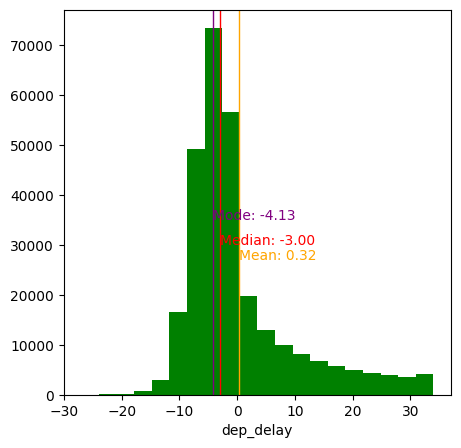

In [22]:
fig, ax = plt.subplots(figsize = [5,5])
ax.hist(dep_delay_new, bins = 20, color = 'g')
ax.set_xlabel('dep_delay')

ax.axvline(mean, color = 'orange', ls = '-', lw = 1)
ax.text(mean, 27000, f'Mean: {mean:.2f}', color = 'orange')

ax.axvline(median, color = 'red', ls = '-', lw = 1)
ax.text(median, 30000, f'Median: {median:.2f}', color = 'red')

ax.axvline(mode, color = 'purple', ls = '-', lw = 1)
ax.text(mode, 35000, f'Mode: {mode:.2f}', color = 'purple')

plt.show()

In [23]:
# Dạng phân bố
skew = stats.skew(dep_delay_new)
kurtosis = stats.kurtosis(dep_delay_new)
print(f'skew: {skew}')
print(f'kurtosis: {kurtosis}')

skew: 1.6162608978990183
kurtosis: 2.2930235558287055


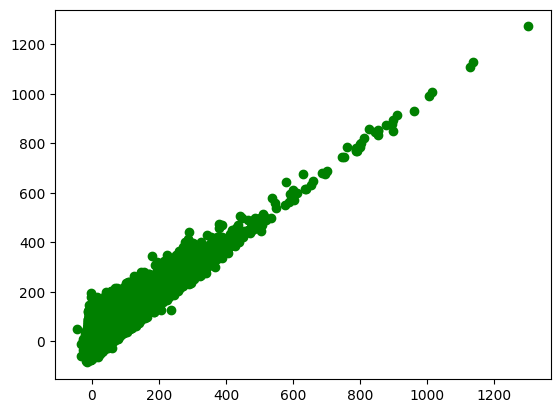

In [24]:
# Tương quan với cột air_time
plt.scatter(dep_delay, arr_delay, color = 'g')
plt.show()

In [25]:
cov = np.cov(dep_delay, arr_delay)
print(cov)

[[1605.25932171 1635.90840237]
 [1635.90840237 1992.1307271 ]]


In [26]:
corr = np.corrcoef(dep_delay, arr_delay)
print(corr)

[[1.         0.91480276]
 [0.91480276 1.        ]]


# Phân tích mô tả cho cột arr_delay

In [27]:
fdata.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0


In [28]:
# Tứ phân vị
q1 = np.quantile(arr_delay, 0.25)
q2 =  np.quantile(arr_delay, 0.5)
q3 =  np.quantile(arr_delay, 0.75)
iqr = q3 - q1
lowerquartile = q1 - 1.5 * iqr
upperquartile = q3 + 1.5 * iqr

In [29]:
# Độ đo về sự mở rộng
mean = np.mean(arr_delay)
median = np.median(arr_delay)
min = np.min(arr_delay)
max = np.max(arr_delay)
ptp = np.ptp(arr_delay)
var = np.var(arr_delay)
std = np.std(arr_delay)
unique = len(np.unique(arr_delay))
count = len(arr_delay)
print(f'mean: {mean}')
print(f'median: {median}')
print(f'min: {min}')
print(f'max: {max}')
print(f'ptp: {ptp}')
print(f'var: {var}')
print(f'std: {std}')
print(f'unique: {unique}')
print(f'count: {count}')

mean: 6.89537675731489
median: -5.0
min: -86.0
max: 1272.0
ptp: 1358.0
var: 1992.1246413983508
std: 44.633223515654244
unique: 577
count: 327346


In [30]:
np.unique(origin, return_counts = True)

(array(['EWR', 'JFK', 'LGA'], dtype=object),
 array([117127, 109079, 101140], dtype=int64))

In [31]:
arr_delay_EWR = arr_delay[origin == 'EWR']
arr_delay_JFK = arr_delay[origin == 'JFK']
arr_delay_LGA = arr_delay[origin == 'LGA']
total_EWR = arr_delay_EWR.sum()
total_JFK = arr_delay_JFK.sum()
total_LGA = arr_delay_LGA.sum()

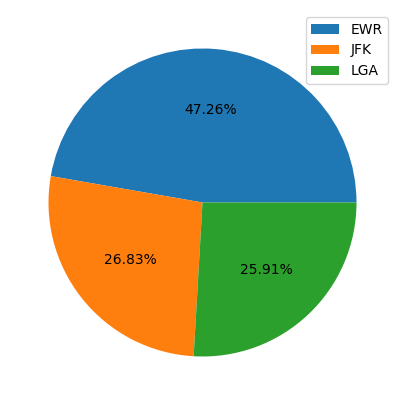

In [32]:
plt.figure(figsize = [5,5])
plt.pie([total_EWR, total_JFK, total_LGA], autopct = '%.2f%%')
plt.legend(list(np.unique(origin)))
plt.show()

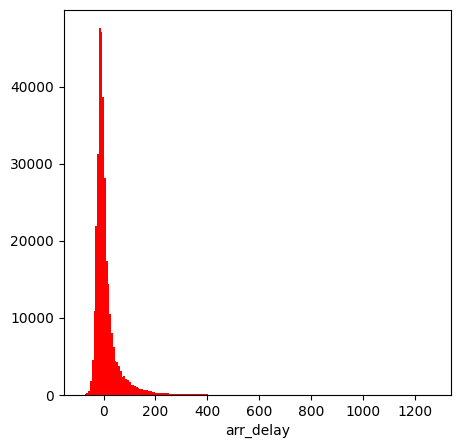

In [33]:
# Khuynh hướng tập trung
fig, ax = plt.subplots(figsize = [5,5])
ax.hist(arr_delay, bins = 200, color = 'r')
ax.set_xlabel('arr_delay')
plt.show()

In [34]:
# Outlier
print(arr_delay[(arr_delay < lowerquartile)])
print(arr_delay[(arr_delay > upperquartile)])

[-65. -70. -64. -67. -64. -68. -64. -67. -70. -64. -64. -69. -70. -70.
 -69. -66. -68. -65. -65. -69. -68. -70. -66. -66. -69. -66. -68. -65.
 -67. -65. -65. -65. -68. -66. -64. -68. -64. -65. -73. -75. -70. -65.
 -64. -67. -74. -69. -71. -75. -68. -68. -64. -86. -65. -71. -65. -65.
 -65. -69. -68. -71. -64. -65. -66. -69. -68. -70. -65. -70. -65. -66.
 -79. -64. -66. -66. -65. -66. -65. -65. -64. -68. -64. -66. -66. -66.
 -67. -66. -67. -67. -68. -64. -65.]
[137. 851. 123. ... 136. 194. 130.]


In [35]:
arr_delay_new = arr_delay[(arr_delay > lowerquartile) & (arr_delay < upperquartile)]
print(arr_delay_new)

[ 11.  20.  33. ... -16.   1. -25.]


In [36]:
#mean, median, mode của arr_delay_new
mean = np.mean(arr_delay_new)
median = np.median(arr_delay_new)
h = np.histogram(arr_delay_new, bins = 20)
counts, bins = h
mode_idx = np.argmax(counts)
mode = np.mean([bins[mode_idx], bins[mode_idx + 1]])
print(f'Mean: {mean}')
print(f'Median: {median}')
print(f'Mode: {mode}')

Mean: -3.686341688205005
Median: -7.0
Mode: -10.724999999999998


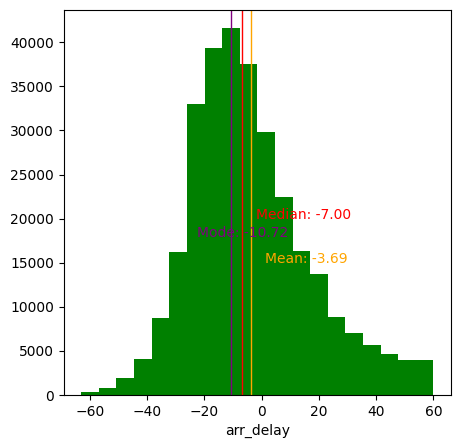

In [37]:
fig, ax = plt.subplots(figsize = [5,5])
ax.hist(arr_delay_new, bins = 20, color = 'g')
ax.set_xlabel('arr_delay')

ax.axvline(mean, color = 'orange', ls = '-', lw = 1)
ax.text(mean + 5, 15000, f'Mean: {mean:.2f}', color = 'orange')

ax.axvline(median, color = 'red', ls = '-', lw = 1)
ax.text(median + 5, 20000, f'Median: {median:.2f}', color = 'red')

ax.axvline(mode, color = 'purple', ls = '-', lw = 1)
ax.text(mode-12, 18000, f'Mode: {mode:.2f}', color = 'purple')

plt.show()

In [38]:
# Dạng phân bố
skew = stats.skew(arr_delay_new)
kurtosis = stats.kurtosis(arr_delay_new)
print(f'skew: {skew}')
print(f'kurtosis: {kurtosis}')

skew: 0.694857301585864
kurtosis: 0.43879015463505633


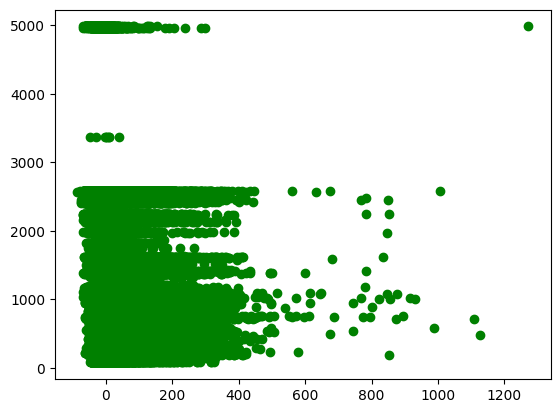

In [39]:
# Tương quan với cột air_time
plt.scatter(arr_delay, distance, color = 'g')
plt.show()

In [40]:
cov = np.cov(arr_delay,distance)
print(cov)

[[  1992.1307271   -2032.10953964]
 [ -2032.10953964 541561.35442296]]


In [41]:
corr = np.corrcoef(arr_delay, distance)
print(corr)

[[ 1.         -0.06186776]
 [-0.06186776  1.        ]]


# Phân tích mô tả cho cột distance

In [42]:
fdata.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0


In [43]:
# Tứ phân vị
q1 = np.quantile(distance, 0.25)
q2 =  np.quantile(distance, 0.5)
q3 =  np.quantile(distance, 0.75)
iqr = q3 - q1
lowerquartile = q1 - 1.5 * iqr
upperquartile = q3 + 1.5 * iqr

In [44]:
# Độ đo về sự mở rộng
mean = np.mean(distance)
median = np.median(distance)
min = np.min(distance)
max = np.max(distance)
ptp = np.ptp(distance)
var = np.var(distance)
std = np.std(distance)
unique = len(np.unique(distance))
count = len(distance)
print(f'mean: {mean}')
print(f'median: {median}')
print(f'min: {min}')
print(f'max: {max}')
print(f'ptp: {ptp}')
print(f'var: {var}')
print(f'std: {std}')
print(f'unique: {unique}')
print(f'count: {count}')

mean: 1048.3713135336923
median: 888.0
min: 80
max: 4983
ptp: 4903
var: 541559.700022553
std: 735.9073990812655
unique: 213
count: 327346


In [45]:
np.unique(origin, return_counts = True)

(array(['EWR', 'JFK', 'LGA'], dtype=object),
 array([117127, 109079, 101140], dtype=int64))

In [46]:
distance_EWR = distance[origin == 'EWR']
distance_JFK = distance[origin == 'JFK']
distance_LGA = distance[origin == 'LGA']
total_EWR = distance_EWR.sum()
total_JFK = distance_JFK.sum()
total_LGA = distance_LGA.sum()

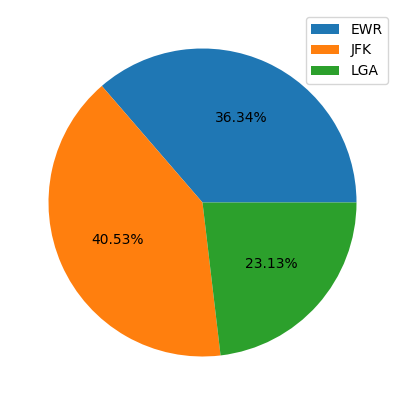

In [47]:
plt.figure(figsize = [5,5])
plt.pie([total_EWR, total_JFK, total_LGA], autopct = '%.2f%%')
plt.legend(list(np.unique(origin)))
plt.show()

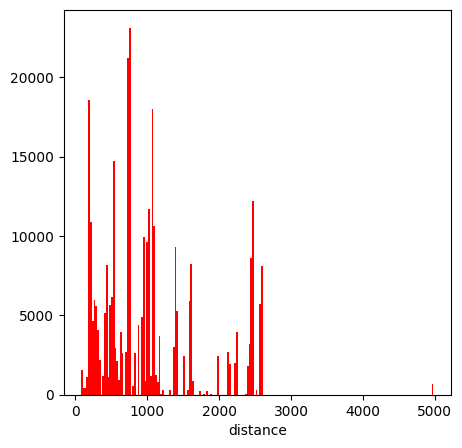

In [48]:
# Khuynh hướng tập trung
fig, ax = plt.subplots(figsize = [5,5])
ax.hist(distance, bins = 200, color = 'r')
ax.set_xlabel('distance')
plt.show()

In [49]:
# Outlier
print(distance[(distance < lowerquartile)])
print(distance[(distance > upperquartile)])

[]
[4983 4963 4983 4963 4983 4963 4983 4963 4983 4963 4983 4963 4983 4963
 4983 4963 4983 4963 4983 4963 4983 4963 4983 4963 4983 4963 4983 4963
 4983 4963 4983 4963 4983 4963 4983 4963 4983 4963 4983 4963 4983 4963
 4983 4963 4983 4963 4983 4963 4983 4963 4983 4963 4983 4963 4983 4963
 4983 4963 4983 4963 4983 4963 4963 4983 4963 4963 4983 4963 4983 4963
 4983 4963 4983 4963 4963 4983 4963 4963 4983 4963 4983 4963 4983 4963
 4983 4963 4963 4983 4963 4963 4983 4963 4983 4963 4983 4963 4983 4963
 4963 4983 4963 4963 4983 4963 4983 4963 4983 4963 4983 4963 4963 4983
 4963 4963 4983 4963 4983 4963 4983 4963 4983 4963 4963 4963 4983 4963
 4963 4983 4963 4983 4963 4983 4963 4983 4963 4983 4983 4963 4963 4963
 4983 4963 4983 4963 4983 4963 4983 4963 4963 4983 4963 4983 4963 4983
 4983 4963 4983 4963 4963 4983 4963 4983 4963 4983 4963 4963 4983 4963
 4983 4983 4963 4983 4963 4963 4983 4963 4983 4963 4983 4963 4983 4963
 4983 4963 4983 4963 4963 4983 4963 4963 4983 4963 4983 4963 4983 4963
 49

In [50]:
distance_new = distance[(distance > lowerquartile) & (distance < upperquartile)]
print(distance_new)

[1400 1416 1089 ...  264  187 1617]


In [51]:
#mean, median, mode của arr_delay_new
mean = np.mean(distance_new)
median = np.median(distance_new)
h = np.histogram(distance_new, bins = 20)
counts, bins = h
mode_idx = np.argmax(counts)
mode = np.mean([bins[mode_idx], bins[mode_idx + 1]])
print(f'Mean: {mean}')
print(f'Median: {median}')
print(f'Mode: {mode}')

Mean: 1039.8922749106807
Median: 888.0
Mode: 769.15


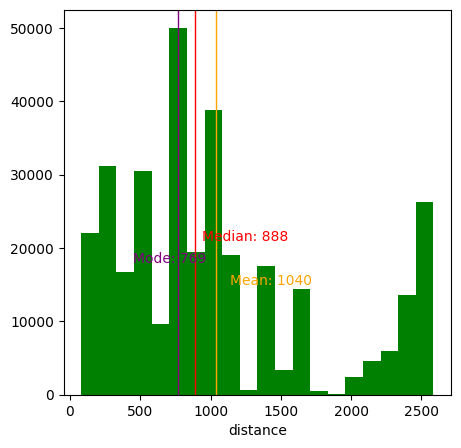

In [52]:
fig, ax = plt.subplots(figsize = [5,5])
ax.hist(distance_new, bins = 20, color = 'g')
ax.set_xlabel('distance')

ax.axvline(mean, color = 'orange', ls = '-', lw = 1)
ax.text(mean + 100, 15000, f'Mean: {mean:.0f}', color = 'orange')

ax.axvline(median, color = 'red', ls = '-', lw = 1)
ax.text(median + 50, 21000, f'Median: {median:.0f}', color = 'red')

ax.axvline(mode, color = 'purple', ls = '-', lw = 1)
ax.text(mode-320, 18000, f'Mode: {mode:.0f}', color = 'purple')

plt.show()

In [53]:
# Dạng phân bố
skew = stats.skew(distance_new)
kurtosis = stats.kurtosis(distance_new)
print(f'skew: {skew}')
print(f'kurtosis: {kurtosis}')

skew: 0.9009445997477097
kurtosis: -0.2236741923789518


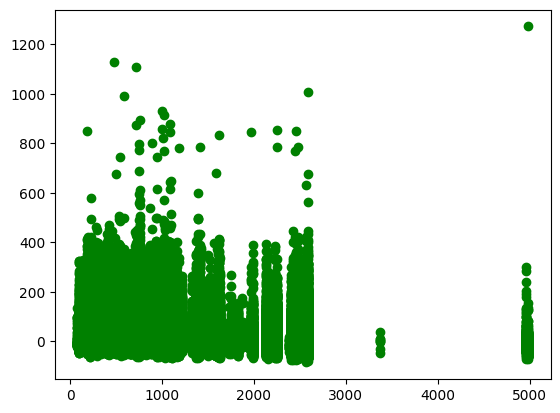

In [54]:
# Tương quan với cột arr_delay
plt.scatter(distance, arr_delay, color = 'g')
plt.show()

In [55]:
cov = np.cov(distance, arr_delay)
print(cov)

[[541561.35442296  -2032.10953964]
 [ -2032.10953964   1992.1307271 ]]


In [56]:
corr = np.corrcoef(distance, arr_delay)
print(corr)

[[ 1.         -0.06186776]
 [-0.06186776  1.        ]]


# Mô hình linear regression dự đoán thời gian đến trễ dựa vào thời gian xuất phát và khoảng cách

In [57]:
# Tứ phân vị
q1_dep_delay = np.quantile(dep_delay, 0.25)
q2_dep_delay =  np.quantile(dep_delay, 0.5)
q3_dep_delay =  np.quantile(dep_delay, 0.75)
iqr_dep_delay = q3_dep_delay - q1_dep_delay
lowerquartile_dep_delay = q1_dep_delay - 1.5 * iqr_dep_delay
upperquartile_dep_delay = q3_dep_delay + 1.5 * iqr_dep_delay

q1_arr_delay = np.quantile(arr_delay, 0.25)
q2_arr_delay =  np.quantile(arr_delay, 0.5)
q3_arr_delay =  np.quantile(arr_delay, 0.75)
iqr_arr_delay = q3_arr_delay - q1_arr_delay
lowerquartile_arr_delay = q1_arr_delay - 1.5 * iqr_arr_delay
upperquartile_arr_delay = q3_arr_delay + 1.5 * iqr_arr_delay

q1_distance = np.quantile(distance, 0.25)
q2_distance =  np.quantile(distance, 0.5)
q3_distance =  np.quantile(distance, 0.75)
iqr_distance = q3_distance - q1_distance
lowerquartile_distance = q1_distance - 1.5 * iqr_distance
upperquartile_distance = q3_distance + 1.5 * iqr_distance


In [58]:
# Xử lý outlier
fdatanew = fdata[(fdata['dep_delay'] > lowerquartile_dep_delay) & (fdata['dep_delay'] < upperquartile_dep_delay)]
fdatanew = fdatanew[(fdatanew['arr_delay'] > lowerquartile_arr_delay) & (fdatanew['arr_delay'] < upperquartile_arr_delay)]
fdatanew = fdatanew[(fdatanew['distance'] > lowerquartile_distance) & (fdatanew['distance'] < upperquartile_distance)]
fdatafinal = fdatanew[['dep_delay', 'distance', 'arr_delay']]
fdatafinal.reset_index(inplace = True, drop = True)
display(fdatafinal)

,dep_delay,distance,arr_delay
0,2.0,1400,11.0
1,4.0,1416,20.0
2,2.0,1089,33.0
3,-1.0,1576,-18.0
4,-6.0,762,-25.0
...,...,...,...
280568,-5.0,209,-17.0
280569,-10.0,301,-20.0
280570,-5.0,264,-16.0
280571,12.0,187,1.0


In [59]:
fdatafinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280573 entries, 0 to 280572
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   dep_delay  280573 non-null  float64
 1   distance   280573 non-null  int64  
 2   arr_delay  280573 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 6.4 MB


# Chuẩn hóa cột dep_delay và distance

In [60]:
# Xử lý cột dep_delay
dep_delay = fdatafinal['dep_delay'].values
mean_dep_delay = np.mean(dep_delay)
std_dep_delay = np.std(dep_delay)
print(f'mean_dep_delay: {round(mean_dep_delay,2)}, \nstd_dep_delay: {round(std_dep_delay,2)}')
dep_delay_standardize = (dep_delay - mean_dep_delay) / std_dep_delay
print(f'dep_delay_standardize: {dep_delay_standardize}')

# Xử lý cột distance
distance = fdatafinal['distance'].values
mean_distance = np.mean(distance)
std_distance = np.std(distance)
print(f'mean_distance: {round(mean_distance,2)}, \nstd_distance: {round(std_distance,2)}')
distance_standardize = (distance - mean_distance) / std_distance
print(f'distance_standardize: {distance_standardize}')

mean_dep_delay: 0.22, 
std_dep_delay: 9.29
dep_delay_standardize: [ 0.19110146  0.4062724   0.19110146 ... -0.56199684  1.26695616
 -1.09992419]
mean_distance: 1051.07, 
std_distance: 717.77
distance_standardize: [ 0.48613398  0.50842521  0.05284831 ... -1.09654294 -1.20381946
  0.78845871]


In [61]:
# thông số sau chuẩn hóa
# Chuẩn hóa cột dep_delay bằng standardscaler
mean_dep_delay_standardize = round(np.mean(dep_delay_standardize),2)
median_dep_delay_standardize = round(np.median(dep_delay_standardize),2)
min_dep_delay_standardize = round(np.min(dep_delay_standardize),2)
max_dep_delay_standardize = round(np.max(dep_delay_standardize),2)
ptp_dep_delay_standardize = round(np.ptp(dep_delay_standardize),2)
var_dep_delay_standardize = round(np.var(dep_delay_standardize),2)
std_dep_delay_standardize = round(np.std(dep_delay_standardize),2)
unique_dep_delay_standardize = len(np.unique(dep_delay_standardize))
count_dep_delay_standardize = len(dep_delay_standardize)
print(f'mean_dep_delay_standardize: {mean_dep_delay_standardize}')
print(f'median_dep_delay_standardize: {median_dep_delay_standardize}')
print(f'min_dep_delay_standardize: {min_dep_delay_standardize}')
print(f'max_dep_delay_standardize: {max_dep_delay_standardize}')
print(f'ptp_dep_delay_standardize: {ptp_dep_delay_standardize}')
print(f'var_dep_delay_standardize: {var_dep_delay_standardize}')
print(f'std_dep_delay_standardize: {std_dep_delay_standardize}')
print(f'unique_dep_delay_standardize: {unique_dep_delay_standardize}')
print(f'count_dep_delay_standardize: {count_dep_delay_standardize}')

print('+=' * 20)

# Chuẩn hóa cột distance bằng standardscaler
mean_distance_standardize = round(np.mean(distance_standardize),2)
median_distance_standardize = round(np.median(distance_standardize),2)
min_distance_standardize = round(np.min(distance_standardize),2)
max_distance_standardize = round(np.max(distance_standardize),2)
ptp_distance_standardize = round(np.ptp(distance_standardize),2)
var_distance_standardize = round(np.var(distance_standardize),2)
std_distance_standardize = round(np.std(distance_standardize),2)
unique_distance_standardize = len(np.unique(distance_standardize))
count_distance_standardize = len(distance_standardize)
print(f'mean_distance_standardize: {mean_distance_standardize}')
print(f'median_distance_standardize: {median_distance_standardize}')
print(f'min_distance_standardize: {min_distance_standardize}')
print(f'max_distance_standardize: {max_distance_standardize}')
print(f'ptp_distance_standardize: {ptp_distance_standardize}')
print(f'var_distance_standardize: {var_distance_standardize}')
print(f'std_distance_standardize: {std_distance_standardize}')
print(f'unique_distance_standardize: {unique_distance_standardize}')
print(f'count_distance_standardize: {count_distance_standardize}')

mean_dep_delay_standardize: 0.0
median_dep_delay_standardize: -0.35
min_dep_delay_standardize: -2.93
max_dep_delay_standardize: 3.63
ptp_dep_delay_standardize: 6.56
var_dep_delay_standardize: 1.0
std_dep_delay_standardize: 1.0
unique_dep_delay_standardize: 62
count_dep_delay_standardize: 280573
+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=
mean_distance_standardize: 0.0
median_distance_standardize: -0.16
min_distance_standardize: -1.35
max_distance_standardize: 2.14
ptp_distance_standardize: 3.49
var_distance_standardize: 1.0
std_distance_standardize: 1.0
unique_distance_standardize: 210
count_distance_standardize: 280573


In [62]:
dep_delay_standardize = pd.Series(dep_delay_standardize)
distance_standardize = pd.Series(distance_standardize)
fdatafinal['dep_delay_standardize'] = dep_delay_standardize
fdatafinal['distance_standardize'] = distance_standardize

In [63]:
fdatafinal_standardize = fdatafinal
display(fdatafinal_standardize)

,dep_delay,distance,arr_delay,dep_delay_standardize,distance_standardize
0,2.0,1400,11.0,0.191101,0.486134
1,4.0,1416,20.0,0.406272,0.508425
2,2.0,1089,33.0,0.191101,0.052848
3,-1.0,1576,-18.0,-0.131655,0.731337
4,-6.0,762,-25.0,-0.669582,-0.402729
...,...,...,...,...,...
280568,-5.0,209,-17.0,-0.561997,-1.173169
280569,-10.0,301,-20.0,-1.099924,-1.044994
280570,-5.0,264,-16.0,-0.561997,-1.096543
280571,12.0,187,1.0,1.266956,-1.203819


In [64]:
X = fdatafinal_standardize[['dep_delay_standardize', 'distance_standardize']].values
Y = fdatafinal_standardize['arr_delay'].values
print(X)
print(Y)

[[ 0.19110146  0.48613398]
 [ 0.4062724   0.50842521]
 [ 0.19110146  0.05284831]
 ...
 [-0.56199684 -1.09654294]
 [ 1.26695616 -1.20381946]
 [-1.09992419  0.78845871]]
[ 11.  20.  33. ... -16.   1. -25.]


In [65]:
np.random.seed(3)
rand_indices = np.arange(fdatafinal_standardize.index.values[-1] + 1)
np.random.shuffle(rand_indices) #xáo trộn trước khi phân ra 2 tập train và test

print(rand_indices.size)
print(rand_indices)

280573
[ 75839 232724 261118 ...  77049 198296  71530]


In [66]:
N_TRAIN = round(0.7*len(rand_indices))
train_indices = rand_indices[0:N_TRAIN]
test_indices = rand_indices[N_TRAIN:]
print(test_indices)
print(train_indices)

[ 59164 155856 180904 ...  77049 198296  71530]
[ 75839 232724 261118 ... 136182 163337  24745]


In [67]:
x_train, y_train = X[train_indices], Y[train_indices]
print(x_train.shape, y_train.shape)

(196401, 2) (196401,)


In [68]:
x_test, y_test = X[test_indices], Y[test_indices]
print(x_test.shape, y_test.shape)

(84172, 2) (84172,)


In [69]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [70]:
model.fit(x_train, y_train)
a = model.coef_
b = model.intercept_
s = x_train[3]
y0_predict1 = np.sum(s*a) + b
print(a)
print(b)
print(y0_predict1)

[ 9.29254361 -2.01727184]
-6.386896020162775
-9.612735611150745


In [71]:
y_hat = model.predict(x_test)
print(y_hat.shape)
print(y_hat)

(84172,)
[ -7.56514967  13.40336908  17.84561017 ... -11.92418271 -13.61170632
 -15.0648553 ]


In [72]:
r2 = model.score(x_train, y_train)
print(f'r2: {r2}')
q2 = model.score(x_test, y_test)
print(f'q2: {q2}') 

r2: 0.2618403194804454
q2: 0.25885479702851355


In [73]:
err = y_hat - y_test
rmse = np.sqrt((np.sum((y_test - y_hat)**2))/len(y_test - y_hat))
print(f'y_hat: {y_hat}')
print(f'y_test: {y_test}')
print(f'err: {err}')
print(f'rmse: {rmse}')

y_hat: [ -7.56514967  13.40336908  17.84561017 ... -11.92418271 -13.61170632
 -15.0648553 ]
y_test: [ 36.  23.  40. ...   8.   6. -18.]
err: [-43.56514967  -9.59663092 -22.15438983 ... -19.92418271 -19.61170632
   2.9351447 ]
rmse: 15.690068176211442


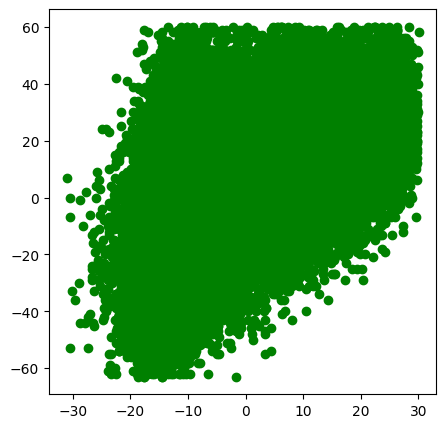

In [74]:
# Scatter plot
plt.figure(figsize=[5,5]) 
plt.scatter(y_hat, y_test, color = 'g') #Nếu kết quả dự đoán hoàn hảo thì biểu đồ scatter
# sẽ nằm trên đường chéo của hình vuông
plt.show()

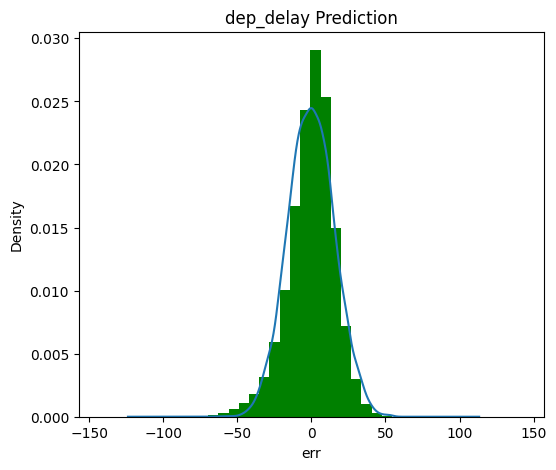

skew: -0.5710122999186071
kurtosis: 1.06227720491869


In [75]:
def plot_error(err, bins=10):
    mean, std = np.mean(err), np.std(err)
    
    plt.figure(figsize=[6,5])    
    plt.title("dep_delay Prediction")
    plt.xlim([mean - 10*std,mean + 10*std])
    plt.hist(err, density=True, bins=bins, color='g')
    
    norm_dist = np.random.normal(mean, std, 10000)
    pd.Series(norm_dist).plot.kde()
    plt.xlabel('err')
    
    plt.show()
    
    skew = stats.skew(err)
    kurtosis = stats.kurtosis(err)
    print(f'skew: {skew}')
    print(f'kurtosis: {kurtosis}')
plot_error(err, bins=20)

In [76]:
# CI 95%
np.percentile(err, [2.5, 97.5])

array([-36.18462537,  28.07581729])

# Thực hiện phân tích cho sân bay JFK

# Cột dep_delay

In [77]:
fdata_JFK = fdata[fdata['origin'] == 'JFK']

In [78]:
dep_delay_JFK = fdata_JFK['dep_delay'].values
air_time_JFK = fdata_JFK['air_time'].values
arr_delay_JFK = fdata_JFK['arr_delay'].values
distance_JFK = fdata_JFK['distance'].values
arr_time_JFK = fdata_JFK['arr_time'].values

In [79]:
# Tứ phân vị
q1 = np.quantile(dep_delay_JFK, 0.25)
q2 =  np.quantile(dep_delay_JFK, 0.5)
q3 =  np.quantile(dep_delay_JFK, 0.75)
iqr = q3 - q1
lowerquartile = q1 - 1.5 * iqr
upperquartile = q3 + 1.5 * iqr

In [80]:
# Độ đo về sự mở rộng
mean_JFK = np.mean(dep_delay_JFK)
median_JFK = np.median(dep_delay_JFK)
min_JFK = np.min(dep_delay_JFK)
max_JFK = np.max(dep_delay_JFK)
ptp_JFK = np.ptp(dep_delay_JFK)
var_JFK = np.var(dep_delay_JFK)
std_JFK = np.std(dep_delay_JFK)
unique_JFK = len(np.unique(dep_delay_JFK))
count_JFK = len(dep_delay_JFK)
print(f'mean_JFK: {mean_JFK}')
print(f'median_JFK: {median_JFK}')
print(f'min_JFK: {min_JFK}')
print(f'max_JFK: {max_JFK}')
print(f'ptp_JFK: {ptp_JFK}')
print(f'var_JFK: {var_JFK}')
print(f'std_JFK: {std_JFK}')
print(f'unique_JFK: {unique_JFK}')
print(f'count_JFK: {count_JFK}')

mean_JFK: 12.023606743736192
median_JFK: -1.0
min_JFK: -43.0
max_JFK: 1301.0
ptp_JFK: 1344.0
var_JFK: 1507.5297189434712
std_JFK: 38.8269200290658
unique_JFK: 424
count_JFK: 109079


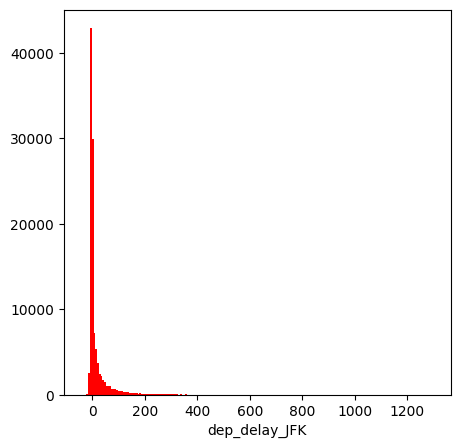

In [81]:
# Khuynh hướng tập trung
fig, ax = plt.subplots(figsize = [5,5])
ax.hist(dep_delay_JFK, bins = 200, color = 'r')
ax.set_xlabel('dep_delay_JFK')
plt.show()

In [82]:
# Outlier
print(dep_delay_JFK[(dep_delay_JFK < lowerquartile)])
print(dep_delay_JFK[(dep_delay_JFK > upperquartile)])

[-43.]
[ 71. 853.  59. ...  38. 194. 154.]


In [83]:
dep_delay_JFK_new = dep_delay_JFK[(dep_delay_JFK > lowerquartile) & (dep_delay_JFK < upperquartile)]
print(dep_delay_JFK_new)

[  2.  -1.  -3. ...  -5.  12. -10.]


In [84]:
#mean, median, mode của dep_delay_JFK_new
mean = np.mean(dep_delay_JFK_new)
median = np.median(dep_delay_JFK_new)
h = np.histogram(dep_delay_JFK_new, bins = 20)
counts, bins = h
mode_idx = np.argmax(counts)
mode = np.mean([bins[mode_idx], bins[mode_idx + 1]])
print(f'Mean: {mean}')
print(f'Median: {median}')
print(f'Mode: {mode}')

Mean: 0.3588689652257526
Median: -2.0
Mode: -3.0000000000000018


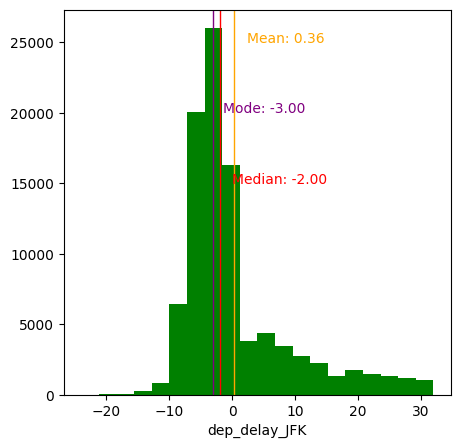

In [85]:
fig, ax = plt.subplots(figsize = [5,5])
ax.hist(dep_delay_JFK_new, bins = 20, color = 'g')
ax.set_xlabel('dep_delay_JFK')

ax.axvline(mean, color = 'orange', ls = '-', lw = 1)
ax.text(mean + 2, 25000, f'Mean: {mean:.2f}', color = 'orange')

ax.axvline(median, color = 'red', ls = '-', lw = 1)
ax.text(median + 2, 15000, f'Median: {median:.2f}', color = 'red')

ax.axvline(mode, color = 'purple', ls = '-', lw = 1)
ax.text(mode + 1.5, 20000, f'Mode: {mode:.2f}', color = 'purple')

plt.show()

In [86]:
# Dạng phân bố
skew = stats.skew(dep_delay_JFK_new)
kurtosis = stats.kurtosis(dep_delay_JFK_new)
print(f'skew: {skew}')
print(f'kurtosis: {kurtosis}')

skew: 1.6565594575727338
kurtosis: 2.4384148794492653


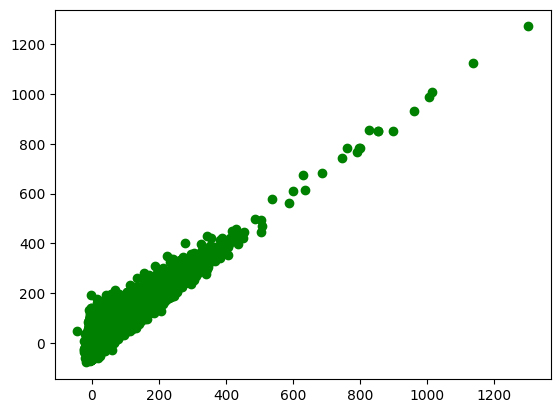

In [87]:
# Tương quan với cột arr_delay
plt.scatter(dep_delay_JFK, arr_delay_JFK, color = 'g')
plt.show()

In [88]:
cov = np.cov(dep_delay_JFK, arr_delay_JFK)
print(cov)

[[1507.5435396  1550.57352478]
 [1550.57352478 1960.49238763]]


In [89]:
corr = np.corrcoef(dep_delay_JFK, arr_delay_JFK)
print(corr)

[[1.         0.90193419]
 [0.90193419 1.        ]]


# Cột arr_delay

In [90]:
fdata_JFK = fdata[fdata['origin'] == 'JFK']
dep_delay_JFK = fdata_JFK['dep_delay'].values
air_time_JFK = fdata_JFK['air_time'].values
arr_delay_JFK = fdata_JFK['arr_delay'].values
distance_JFK = fdata_JFK['distance'].values
arr_time_JFK = fdata_JFK['arr_time'].values

In [91]:
# Tứ phân vị
q1 = np.quantile(arr_delay_JFK, 0.25)
q2 =  np.quantile(arr_delay_JFK, 0.5)
q3 =  np.quantile(arr_delay_JFK, 0.75)
iqr = q3 - q1
lowerquartile = q1 - 1.5 * iqr
upperquartile = q3 + 1.5 * iqr

In [92]:
# Độ đo về sự mở rộng
mean_JFK = np.mean(arr_delay_JFK)
median_JFK = np.median(arr_delay_JFK)
min_JFK = np.min(arr_delay_JFK)
max_JFK = np.max(arr_delay_JFK)
ptp_JFK = np.ptp(arr_delay_JFK)
var_JFK = np.var(arr_delay_JFK)
std_JFK = np.std(arr_delay_JFK)
unique_JFK = len(np.unique(arr_delay_JFK))
count_JFK = len(arr_delay_JFK)
print(f'mean_JFK: {mean_JFK}')
print(f'median_JFK: {median_JFK}')
print(f'min_JFK: {min_JFK}')
print(f'max_JFK: {max_JFK}')
print(f'ptp_JFK: {ptp_JFK}')
print(f'var_JFK: {var_JFK}')
print(f'std_JFK: {std_JFK}')
print(f'unique_JFK: {unique_JFK}')
print(f'count_JFK: {count_JFK}')

mean_JFK: 5.551481036679838
median_JFK: -6.0
min_JFK: -79.0
max_JFK: 1272.0
ptp_JFK: 1351.0
var_JFK: 1960.4744144907684
std_JFK: 44.27724488369583
unique_JFK: 474
count_JFK: 109079


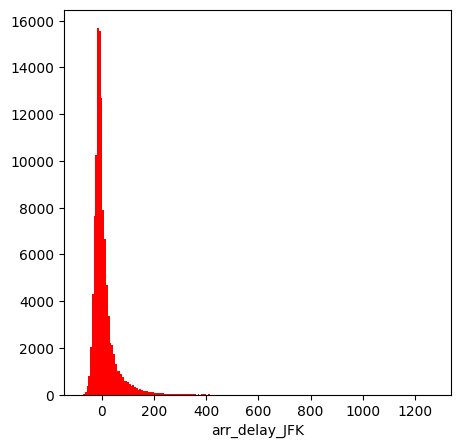

In [93]:
# Khuynh hướng tập trung
fig, ax = plt.subplots(figsize = [5,5])
ax.hist(arr_delay_JFK, bins = 200, color = 'r')
ax.set_xlabel('arr_delay_JFK')
plt.show()

In [94]:
# Outlier
print(arr_delay_JFK[(arr_delay_JFK < lowerquartile)])
print(arr_delay_JFK[(arr_delay_JFK > upperquartile)])

[-65. -70. -67. -70. -69. -69. -66. -68. -65. -65. -69. -68. -66. -66.
 -69. -66. -65. -67. -65. -65. -68. -66. -68. -70. -71. -75. -68. -68.
 -65. -65. -71. -65. -69. -65. -70. -66. -79. -66. -65. -65. -68. -66.
 -66. -66. -66.]
[851.  78.  83. ...  68. 194. 130.]


In [95]:
arr_delay_JFK_new = arr_delay_JFK[(arr_delay_JFK > lowerquartile) & (arr_delay_JFK < upperquartile)]
print(arr_delay_JFK_new)

[ 33. -18.  -8. ... -16.   1. -25.]


In [96]:
#mean, median, mode của dep_delay_JFK_new
mean = np.mean(arr_delay_JFK_new)
median = np.median(arr_delay_JFK_new)
h = np.histogram(arr_delay_JFK_new, bins = 20)
counts, bins = h
mode_idx = np.argmax(counts)
mode = np.mean([bins[mode_idx], bins[mode_idx + 1]])
print(f'Mean: {mean}')
print(f'Median: {median}')
print(f'Mode: {mode}')

Mean: -4.742762506129229
Median: -8.0
Mode: -11.724999999999998


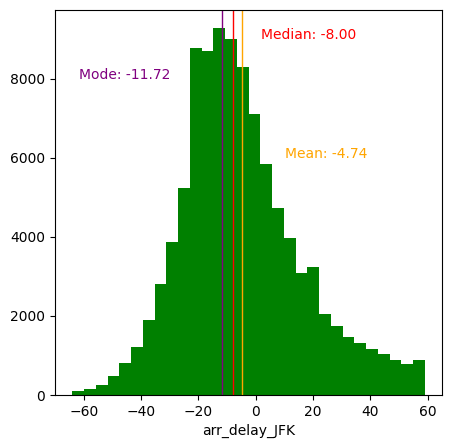

In [97]:
fig, ax = plt.subplots(figsize = [5,5])
ax.hist(arr_delay_JFK_new, bins = 30, color = 'g')
ax.set_xlabel('arr_delay_JFK')

ax.axvline(mean, color = 'orange', ls = '-', lw = 1)
ax.text(mean + 15, 6000, f'Mean: {mean:.2f}', color = 'orange')

ax.axvline(median, color = 'red', ls = '-', lw = 1)
ax.text(median + 10, 9000, f'Median: {median:.2f}', color = 'red')

ax.axvline(mode, color = 'purple', ls = '-', lw = 1)
ax.text(mode - 50, 8000, f'Mode: {mode:.2f}', color = 'purple')

plt.show()

In [98]:
# Dạng phân bố
skew = stats.skew(arr_delay_JFK_new)
kurtosis = stats.kurtosis(arr_delay_JFK_new)
print(f'skew: {skew}')
print(f'kurtosis: {kurtosis}')

skew: 0.6179200720448246
kurtosis: 0.3890673690332158


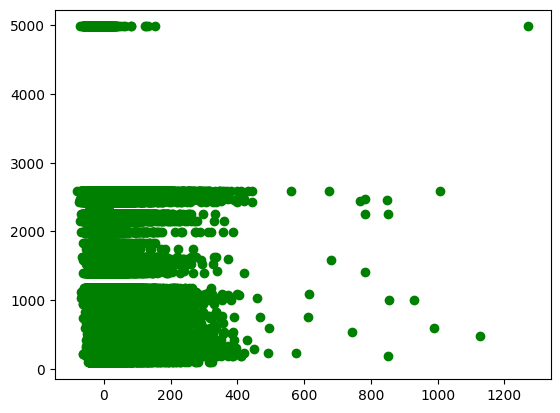

In [99]:
# Tương quan với cột distance
plt.scatter(arr_delay_JFK, distance_JFK, color = 'g')
plt.show()

In [100]:
cov = np.cov(arr_delay_JFK, distance_JFK)
print(cov)

[[  1960.49238763  -2877.46960039]
 [ -2877.46960039 803493.25440075]]


In [101]:
corr = np.corrcoef(arr_delay_JFK, distance_JFK)
print(corr)

[[ 1.         -0.07249984]
 [-0.07249984  1.        ]]


# Cột distance

In [102]:
fdata_JFK = fdata[fdata['origin'] == 'JFK']
dep_delay_JFK = fdata_JFK['dep_delay'].values
air_time_JFK = fdata_JFK['air_time'].values
arr_delay_JFK = fdata_JFK['arr_delay'].values
distance_JFK = fdata_JFK['distance'].values
arr_time_JFK = fdata_JFK['arr_time'].values

In [103]:
# Tứ phân vị
q1 = np.quantile(distance_JFK, 0.25)
q2 =  np.quantile(distance_JFK, 0.5)
q3 =  np.quantile(distance_JFK, 0.75)
iqr = q3 - q1
lowerquartile = q1 - 1.5 * iqr
upperquartile = q3 + 1.5 * iqr

In [104]:
# Độ đo về sự mở rộng
mean_JFK = np.mean(distance_JFK)
median_JFK = np.median(distance_JFK)
min_JFK = np.min(distance_JFK)
max_JFK = np.max(distance_JFK)
ptp_JFK = np.ptp(distance_JFK)
var_JFK = np.var(distance_JFK)
std_JFK = np.std(distance_JFK)
unique_JFK = len(np.unique(arr_delay_JFK))
count_JFK = len(distance_JFK)
print(f'mean_JFK: {mean_JFK}')
print(f'median_JFK: {median_JFK}')
print(f'min_JFK: {min_JFK}')
print(f'max_JFK: {max_JFK}')
print(f'ptp_JFK: {ptp_JFK}')
print(f'var_JFK: {var_JFK}')
print(f'std_JFK: {std_JFK}')
print(f'unique_JFK: {unique_JFK}')
print(f'count_JFK: {count_JFK}')

mean_JFK: 1275.2105904894618
median_JFK: 1069.0
min_JFK: 94
max_JFK: 4983
ptp_JFK: 4889
var_JFK: 803485.8882417869
std_JFK: 896.3737436146748
unique_JFK: 474
count_JFK: 109079


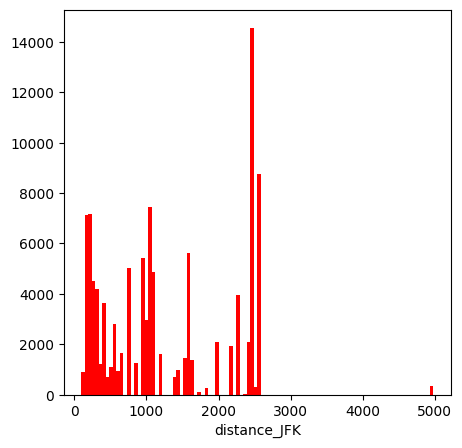

In [105]:
# Khuynh hướng tập trung
fig, ax = plt.subplots(figsize = [5,5])
ax.hist(distance_JFK, bins = 100, color = 'r')
ax.set_xlabel('distance_JFK')
plt.show()

In [106]:
# Outlier
print(distance_JFK[(distance_JFK < lowerquartile)])
print(distance_JFK[(distance_JFK > upperquartile)])

[]
[4983 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983
 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983
 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983
 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983
 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983
 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983
 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983
 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983
 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983
 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983
 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983
 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983
 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983
 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983 4983
 49

In [107]:
distance_JFK_new = distance_JFK[(distance_JFK > lowerquartile) & (distance_JFK < upperquartile)]
print(distance_JFK_new)

[1089 1576  944 ...  264  187 1617]


In [108]:
#mean, median, mode của distance_JFK_new
mean = np.mean(distance_JFK_new)
median = np.median(distance_JFK_new)
h = np.histogram(distance_JFK_new, bins = 20)
counts, bins = h
mode_idx = np.argmax(counts)
mode = np.mean([bins[mode_idx], bins[mode_idx + 1]])
print(f'Mean: {mean}')
print(f'Median: {median}')
print(f'Mode: {mode}')

Mean: 1263.5488380220165
Median: 1069.0
Mode: 2523.7


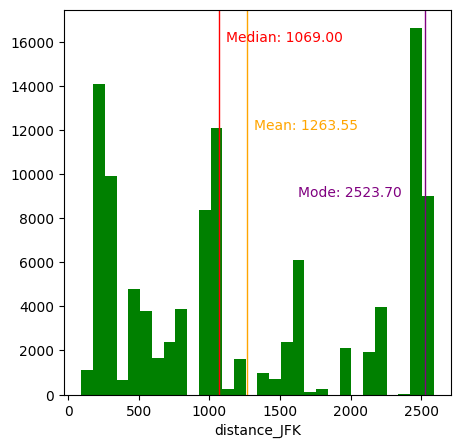

In [109]:
fig, ax = plt.subplots(figsize = [5,5])
ax.hist(distance_JFK_new, bins = 30, color = 'g')
ax.set_xlabel('distance_JFK')

ax.axvline(mean, color = 'orange', ls = '-', lw = 1)
ax.text(mean + 50, 12000, f'Mean: {mean:.2f}', color = 'orange')

ax.axvline(median, color = 'red', ls = '-', lw = 1)
ax.text(median + 50, 16000, f'Median: {median:.2f}', color = 'red')

ax.axvline(mode, color = 'purple', ls = '-', lw = 1)
ax.text(mode - 900, 9000, f'Mode: {mode:.2f}', color = 'purple')

plt.show()

In [110]:
# Dạng phân bố
skew = stats.skew(distance_JFK_new)
kurtosis = stats.kurtosis(distance_JFK_new)
print(f'skew: {skew}')
print(f'kurtosis: {kurtosis}')

skew: 0.3081683267492033
kurtosis: -1.4102262056625758


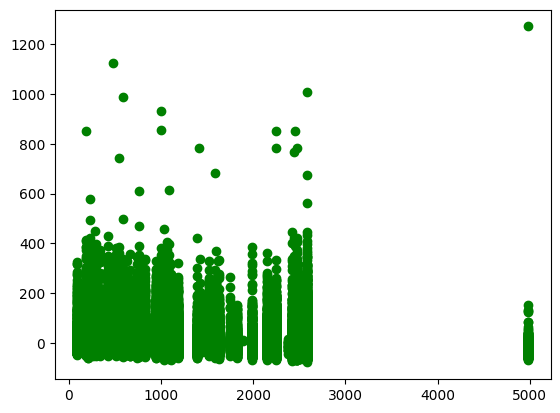

In [111]:
# Tương quan với cột arr_delay
plt.scatter(distance_JFK, arr_delay_JFK, color = 'g')
plt.show()

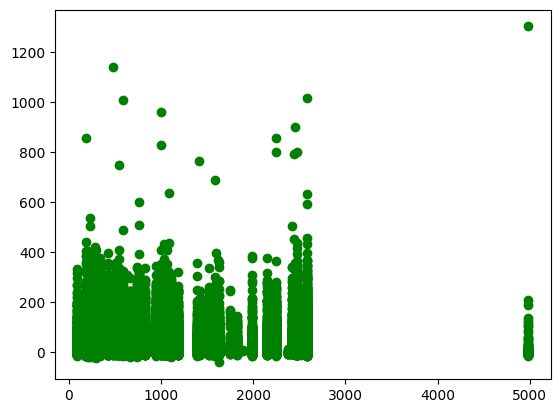

In [112]:
# Tương quan với cột dep_delay
plt.scatter(distance_JFK, dep_delay_JFK, color = 'g')
plt.show()

In [113]:
cov1 = np.cov(distance_JFK, arr_delay_JFK)
print(cov1)
cov2 = np.cov(distance_JFK, dep_delay_JFK)
print(cov2)

[[803493.25440075  -2877.46960039]
 [ -2877.46960039   1960.49238763]]
[[803493.25440075  -1371.1283235 ]
 [ -1371.1283235    1507.5435396 ]]


In [114]:
corr1 = np.corrcoef(distance_JFK, arr_delay_JFK)
print(corr1)
corr2 = np.corrcoef(distance_JFK, dep_delay_JFK)
print(corr2)

[[ 1.         -0.07249984]
 [-0.07249984  1.        ]]
[[ 1.         -0.03939599]
 [-0.03939599  1.        ]]


# Mô hình linear regression dự đoán thời gian đến trễ dựa vào thời gian xuất phát và khoảng cách đối với sân bay JFK

In [115]:
# Tứ phân vị
q1_dep_delay_JFK = np.quantile(dep_delay_JFK, 0.25)
q2_dep_delay_JFK =  np.quantile(dep_delay_JFK, 0.5)
q3_dep_delay_JFK =  np.quantile(dep_delay_JFK, 0.75)
iqr_dep_delay_JFK = q3_dep_delay_JFK - q1_dep_delay_JFK
lowerquartile_dep_delay_JFK = q1_dep_delay_JFK - 1.5 * iqr_dep_delay_JFK
upperquartile_dep_delay_JFK = q3_dep_delay_JFK + 1.5 * iqr_dep_delay_JFK

q1_arr_delay_JFK = np.quantile(arr_delay_JFK, 0.25)
q2_arr_delay_JFK =  np.quantile(arr_delay_JFK, 0.5)
q3_arr_delay_JFK =  np.quantile(arr_delay_JFK, 0.75)
iqr_arr_delay_JFK = q3_arr_delay_JFK - q1_arr_delay_JFK
lowerquartile_arr_delay_JFK = q1_arr_delay_JFK - 1.5 * iqr_arr_delay_JFK
upperquartile_arr_delay_JFK = q3_arr_delay_JFK + 1.5 * iqr_arr_delay_JFK

q1_distance_JFK = np.quantile(distance_JFK, 0.25)
q2_distance_JFK =  np.quantile(distance_JFK, 0.5)
q3_distance_JFK =  np.quantile(distance_JFK, 0.75)
iqr_distance_JFK = q3_distance_JFK - q1_distance_JFK
lowerquartile_distance_JFK = q1_distance_JFK - 1.5 * iqr_distance_JFK
upperquartile_distance_JFK = q3_distance_JFK + 1.5 * iqr_distance_JFK


In [116]:
# Xử lý outlier
fdata_JFK_new = fdata_JFK[(fdata_JFK['dep_delay'] > lowerquartile_dep_delay_JFK) & (fdata_JFK['dep_delay'] < upperquartile_dep_delay_JFK)]
fdata_JFK_new = fdata_JFK_new[(fdata_JFK_new['arr_delay'] > lowerquartile_arr_delay_JFK) & (fdata_JFK_new['arr_delay'] < upperquartile_arr_delay_JFK)]
fdata_JFK_new = fdata_JFK_new[(fdata_JFK_new['distance'] > lowerquartile_distance_JFK) & (fdata_JFK_new['distance'] < upperquartile_distance_JFK)]
fdata_JFK_final = fdata_JFK_new[['dep_delay', 'distance', 'arr_delay']]
fdata_JFK_final.reset_index(inplace = True, drop = True)
display(fdata_JFK_final)

,dep_delay,distance,arr_delay
0,2.0,1089,33.0
1,-1.0,1576,-18.0
2,-3.0,944,-8.0
3,-2.0,1028,-2.0
4,-2.0,1005,-3.0
...,...,...,...
93408,-5.0,209,-17.0
93409,-10.0,301,-20.0
93410,-5.0,264,-16.0
93411,12.0,187,1.0


In [117]:
fdata_JFK_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93413 entries, 0 to 93412
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   dep_delay  93413 non-null  float64
 1   distance   93413 non-null  int64  
 2   arr_delay  93413 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 2.1 MB


In [118]:
# Xử lý cột dep_delay
dep_delay_JFK = fdata_JFK_final['dep_delay'].values
mean_dep_delay_JFK = np.mean(dep_delay_JFK)
std_dep_delay_JFK = np.std(dep_delay_JFK)
print(f'mean_dep_delay_JFK: {round(mean_dep_delay_JFK,2)}, \nstd_dep_delay_JFK: {round(std_dep_delay_JFK,2)}')
dep_delay_JFK_standardize = (dep_delay_JFK - mean_dep_delay_JFK) / std_dep_delay_JFK
print(f'dep_delay_JFK_standardize: {dep_delay_JFK_standardize}')

# Xử lý cột distance
distance_JFK = fdata_JFK_final['distance'].values
mean_distance_JFK = np.mean(distance_JFK)
std_distance_JFK = np.std(distance_JFK)
print(f'mean_distance_JFK: {round(mean_distance_JFK,2)}, \nstd_distance_JFK: {round(std_distance_JFK,2)}')
distance_JFK_standardize = (distance_JFK - mean_distance_JFK) / std_distance_JFK
print(f'distance_JFK_standardize: {distance_JFK_standardize}')

mean_dep_delay_JFK: 0.27, 
std_dep_delay_JFK: 8.61
dep_delay_JFK_standardize: [ 0.20048178 -0.14781997 -0.38002113 ... -0.61222229  1.36148759
 -1.1927252 ]
mean_distance_JFK: 1279.95, 
std_distance_JFK: 875.81
distance_JFK_standardize: [-0.21802345  0.33803364 -0.3835846  ... -1.1600093  -1.24792798
  0.38484749]


In [119]:
# thông số sau chuẩn hóa
# Chuẩn hóa cột dep_delay bằng standardscaler
mean_dep_delay_JFK_standardize = round(np.mean(dep_delay_JFK_standardize),2)
median_dep_delay_JFK_standardize = round(np.median(dep_delay_JFK_standardize),2)
min_dep_delay_JFK_standardize = round(np.min(dep_delay_JFK_standardize),2)
max_dep_delay_JFK_standardize = round(np.max(dep_delay_JFK_standardize),2)
ptp_dep_delay_JFK_standardize = round(np.ptp(dep_delay_JFK_standardize),2)
var_dep_delay_JFK_standardize = round(np.var(dep_delay_JFK_standardize),2)
std_dep_delay_JFK_standardize = round(np.std(dep_delay_JFK_standardize),2)
unique_dep_delay_JFK_standardize = len(np.unique(dep_delay_JFK_standardize))
count_dep_delay_JFK_standardize = len(dep_delay_JFK_standardize)
print(f'mean_dep_delay_JFK_standardize: {mean_dep_delay_JFK_standardize}')
print(f'median_dep_delay_JFK_standardize: {median_dep_delay_JFK_standardize}')
print(f'min_dep_delay_JFK_standardize: {min_dep_delay_JFK_standardize}')
print(f'max_dep_delay_JFK_standardize: {max_dep_delay_JFK_standardize}')
print(f'ptp_dep_delay_JFK_standardize: {ptp_dep_delay_JFK_standardize}')
print(f'var_dep_delay_JFK_standardize: {var_dep_delay_JFK_standardize}')
print(f'std_dep_delay_JFK_standardize: {std_dep_delay_JFK_standardize}')
print(f'unique_dep_delay_JFK_standardize: {unique_dep_delay_JFK_standardize}')
print(f'count_dep_delay_JFK_standardize: {count_dep_delay_JFK_standardize}')

print('+=' * 20)

# Chuẩn hóa cột distance bằng standardscaler
mean_distance_JFK_standardize = round(np.mean(distance_JFK_standardize),2)
median_distance_JFK_standardize = round(np.median(distance_JFK_standardize),2)
min_distance_JFK_standardize = round(np.min(distance_JFK_standardize),2)
max_distance_JFK_standardize = round(np.max(distance_JFK_standardize),2)
ptp_distance_JFK_standardize = round(np.ptp(distance_JFK_standardize),2)
var_distance_JFK_standardize = round(np.var(distance_JFK_standardize),2)
std_distance_JFK_standardize = round(np.std(distance_JFK_standardize),2)
unique_distance_JFK_standardize = len(np.unique(distance_JFK_standardize))
count_distance_JFK_standardize = len(distance_JFK_standardize)
print(f'mean_distance_JFK_standardize: {mean_distance_JFK_standardize}')
print(f'median_distance_JFK_standardize: {median_distance_JFK_standardize}')
print(f'min_distance_JFK_standardize: {min_distance_JFK_standardize}')
print(f'max_distance_JFK_standardize: {max_distance_JFK_standardize}')
print(f'ptp_distance_JFK_standardize: {ptp_distance_JFK_standardize}')
print(f'var_distance_JFK_standardize: {var_distance_JFK_standardize}')
print(f'std_distance_JFK_standardize: {std_distance_JFK_standardize}')
print(f'unique_distance_JFK_standardize: {unique_distance_JFK_standardize}')
print(f'count_distance_JFK_standardize: {count_distance_JFK_standardize}')

mean_dep_delay_JFK_standardize: -0.0
median_dep_delay_JFK_standardize: -0.26
min_dep_delay_JFK_standardize: -2.82
max_dep_delay_JFK_standardize: 3.68
ptp_dep_delay_JFK_standardize: 6.5
var_dep_delay_JFK_standardize: 1.0
std_dep_delay_JFK_standardize: 1.0
unique_dep_delay_JFK_standardize: 57
count_dep_delay_JFK_standardize: 93413
+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=
mean_distance_JFK_standardize: -0.0
median_distance_JFK_standardize: -0.24
min_distance_JFK_standardize: -1.35
max_distance_JFK_standardize: 1.49
ptp_distance_JFK_standardize: 2.85
var_distance_JFK_standardize: 1.0
std_distance_JFK_standardize: 1.0
unique_distance_JFK_standardize: 69
count_distance_JFK_standardize: 93413


In [120]:
dep_delay_JFK_standardize = pd.Series(dep_delay_JFK_standardize)
distance_JFK_standardize = pd.Series(distance_JFK_standardize)
fdata_JFK_final['dep_delay_JFK_standardize'] = dep_delay_JFK_standardize
fdata_JFK_final['distance_JFK_standardize'] = distance_JFK_standardize

In [121]:
fdatafinal_JFK_standardize = fdata_JFK_final
display(fdatafinal_JFK_standardize)

,dep_delay,distance,arr_delay,dep_delay_JFK_standardize,distance_JFK_standardize
0,2.0,1089,33.0,0.200482,-0.218023
1,-1.0,1576,-18.0,-0.147820,0.338034
2,-3.0,944,-8.0,-0.380021,-0.383585
3,-2.0,1028,-2.0,-0.263921,-0.287673
4,-2.0,1005,-3.0,-0.263921,-0.313935
...,...,...,...,...,...
93408,-5.0,209,-17.0,-0.612222,-1.222808
93409,-10.0,301,-20.0,-1.192725,-1.117763
93410,-5.0,264,-16.0,-0.612222,-1.160009
93411,12.0,187,1.0,1.361488,-1.247928


In [122]:
X = fdatafinal_JFK_standardize[['dep_delay_JFK_standardize', 'distance_JFK_standardize']].values
Y = fdatafinal_JFK_standardize['arr_delay'].values
print(X)
print(Y)

[[ 0.20048178 -0.21802345]
 [-0.14781997  0.33803364]
 [-0.38002113 -0.3835846 ]
 ...
 [-0.61222229 -1.1600093 ]
 [ 1.36148759 -1.24792798]
 [-1.1927252   0.38484749]]
[ 33. -18.  -8. ... -16.   1. -25.]


In [123]:
np.random.seed(3)
rand_indices = np.arange(fdatafinal_JFK_standardize.index.values[-1] + 1)
np.random.shuffle(rand_indices) #xáo trộn trước khi phân ra 2 tập train và test

print(rand_indices.size)
print(rand_indices)

93413
[84150 14890  2793 ... 77049 67224 71530]


In [124]:
N_TRAIN = round(0.7*len(rand_indices))
train_indices = rand_indices[0:N_TRAIN]
test_indices = rand_indices[N_TRAIN:]
print(test_indices)
print(len(test_indices))
print(train_indices)
print(len(train_indices))

[49773 16564 41666 ... 77049 67224 71530]
28024
[84150 14890  2793 ... 59995 90743 81407]
65389


In [125]:
x_train, y_train = X[train_indices], Y[train_indices]
print(x_train.shape, y_train.shape)

(65389, 2) (65389,)


In [126]:
x_test, y_test = X[test_indices], Y[test_indices]
print(x_test.shape, y_test.shape)

(28024, 2) (28024,)


In [127]:
model = LinearRegression()
model.fit(x_train, y_train)
a = model.coef_
b = model.intercept_
s = x_train[3]
y0_predict1 = np.sum(s*a) + b
print(a)
print(b)
print(y0_predict1)

[ 8.48084276 -1.85158453]
-7.333502304825702
-11.228810720319183


In [128]:
y_hat = model.predict(x_test)
print(y_hat.shape)
print(y_hat)

(28024,)
[ -9.97512504  13.61273457 -14.18270305 ...  -6.14175002   6.58601029
  -6.4583122 ]


In [129]:
r2 = model.score(x_train, y_train)
print(f'r2: {r2}')
q2 = model.score(x_test, y_test)
print(f'q2: {q2}') 

r2: 0.21235436031050547
q2: 0.2123992259810682


In [130]:
err = y_hat - y_test
rmse = np.sqrt((np.sum((y_test - y_hat)**2))/len(y_test - y_hat))
print(f'y_hat: {y_hat}')
print(f'y_test: {y_test}')
print(f'err: {err}')
print(f'rmse: {rmse}')

y_hat: [ -9.97512504  13.61273457 -14.18270305 ...  -6.14175002   6.58601029
  -6.4583122 ]
y_test: [-2. 42. -3. ...  1. 17. -9.]
err: [ -7.97512504 -28.38726543 -11.18270305 ...  -7.14175002 -10.41398971
   2.5416878 ]
rmse: 16.649202768056092


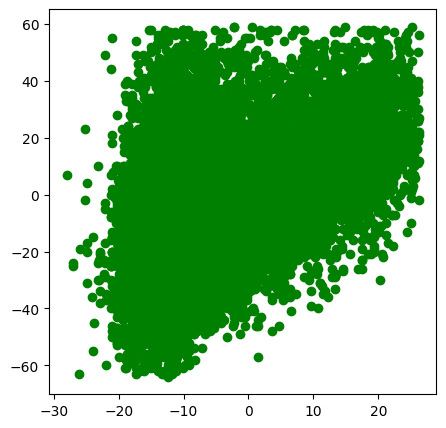

In [131]:
# Scatter plot
plt.figure(figsize=[5,5]) 
plt.scatter(y_hat, y_test, color = 'g') #Nếu kết quả dự đoán hoàn hảo thì biểu đồ scatter
# sẽ nằm trên đường chéo của hình vuông
plt.show()

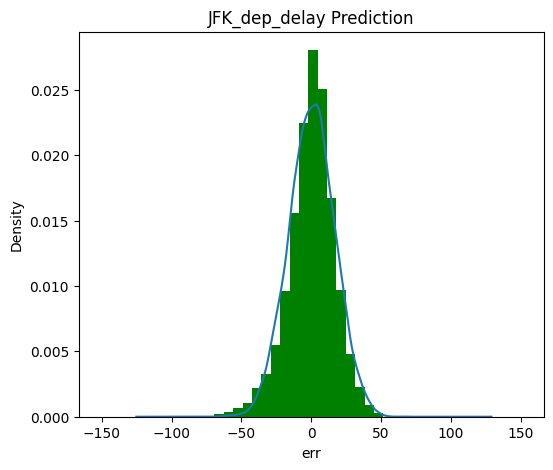

skew: -0.4825726287194697
kurtosis: 0.9385853111126572


In [132]:
def plot_error(err, bins=10):
    mean, std = np.mean(err), np.std(err)
    
    plt.figure(figsize=[6,5])    
    plt.title("JFK_dep_delay Prediction")
    plt.xlim([mean - 10*std,mean + 10*std])
    plt.hist(err, density=True, bins=bins, color='g')
    
    norm_dist = np.random.normal(mean, std, 10000)
    pd.Series(norm_dist).plot.kde()
    plt.xlabel('err')
    
    plt.show()
    
    skew = stats.skew(err)
    kurtosis = stats.kurtosis(err)
    print(f'skew: {skew}')
    print(f'kurtosis: {kurtosis}')
plot_error(err, bins=20)

In [133]:
# CI 95%
np.percentile(err, [2.5, 97.5])

array([-37.82939766,  30.8105289 ])

# Thực hiện phân tích cho sân bay EWR

# Cột dep_delay

In [134]:
fdata_EWR = fdata[fdata['origin'] == 'EWR']

In [135]:
dep_delay_EWR = fdata_EWR['dep_delay'].values
air_time_EWR = fdata_EWR['air_time'].values
arr_delay_EWR = fdata_EWR['arr_delay'].values
distance_EWR = fdata_EWR['distance'].values
arr_time_EWR = fdata_EWR['arr_time'].values

In [136]:
# Tứ phân vị
q1 = np.quantile(arr_delay_EWR, 0.25)
q2 =  np.quantile(arr_delay_EWR, 0.5)
q3 =  np.quantile(arr_delay_EWR, 0.75)
iqr = q3 - q1
lowerquartile = q1 - 1.5 * iqr
upperquartile = q3 + 1.5 * iqr

In [137]:
# Độ đo về sự mở rộng
mean_EWR = np.mean(dep_delay_EWR)
median_EWR = np.median(dep_delay_EWR)
min_EWR = np.min(dep_delay_EWR)
max_EWR = np.max(dep_delay_EWR)
ptp_EWR = np.ptp(dep_delay_EWR)
var_EWR = np.var(dep_delay_EWR)
std_EWR = np.std(dep_delay_EWR)
unique_EWR = len(np.unique(dep_delay_EWR))
count_EWR = len(dep_delay_EWR)
print(f'mean_EWR: {mean_EWR}')
print(f'median_EWR: {median_EWR}')
print(f'min_EWR: {min_EWR}')
print(f'max_EWR: {max_EWR}')
print(f'ptp_EWR: {ptp_EWR}')
print(f'var_EWR: {var_EWR}')
print(f'std_EWR: {std_EWR}')
print(f'unique_EWR: {unique_EWR}')
print(f'count_EWR: {count_EWR}')

mean_EWR: 15.009109769737123
median_EWR: -1.0
min_EWR: -25.0
max_EWR: 1126.0
ptp_EWR: 1151.0
var_EWR: 1696.2068803937238
std_EWR: 41.185032237376284
unique_EWR: 430
count_EWR: 117127


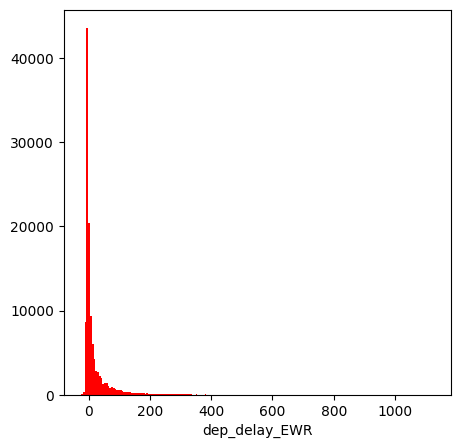

In [138]:
# Khuynh hướng tập trung
fig, ax = plt.subplots(figsize = [5,5])
ax.hist(dep_delay_EWR, bins = 200, color = 'r')
ax.set_xlabel('dep_delay_EWR')
plt.show()

In [139]:
# Outlier
print(dep_delay_EWR[(dep_delay_EWR < lowerquartile)])
print(dep_delay_EWR[(dep_delay_EWR > upperquartile)])

[]
[144.  96. 115. ...  74.  72.  80.]


In [140]:
dep_delay_EWR_new = dep_delay_EWR[(dep_delay_EWR > lowerquartile) & (dep_delay_EWR < upperquartile)]
print(dep_delay_EWR_new)

[ 2. -4. -5. ... 13. -7. -9.]


In [141]:
#mean, median, mode của dep_delay_EWR_new
mean = np.mean(dep_delay_EWR_new)
median = np.median(dep_delay_EWR_new)
h = np.histogram(dep_delay_EWR_new, bins = 20)
counts, bins = h
mode_idx = np.argmax(counts)
mode = np.mean([bins[mode_idx], bins[mode_idx + 1]])
print(f'Mean: {mean}')
print(f'Median: {median}')
print(f'Mode: {mode}')

Mean: 4.632433696618176
Median: -1.0
Mode: -0.7999999999999989


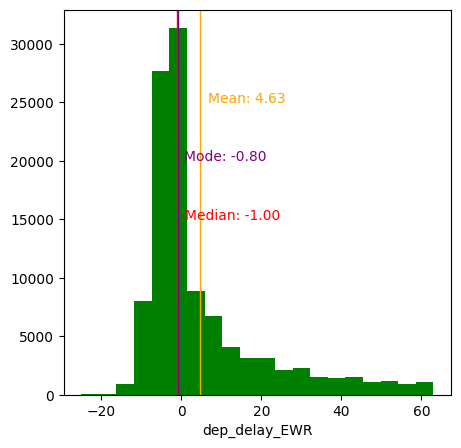

In [142]:
fig, ax = plt.subplots(figsize = [5,5])
ax.hist(dep_delay_EWR_new, bins = 20, color = 'g')
ax.set_xlabel('dep_delay_EWR')

ax.axvline(mean, color = 'orange', ls = '-', lw = 1)
ax.text(mean + 2, 25000, f'Mean: {mean:.2f}', color = 'orange')

ax.axvline(median, color = 'red', ls = '-', lw = 1)
ax.text(median + 2, 15000, f'Median: {median:.2f}', color = 'red')

ax.axvline(mode, color = 'purple', ls = '-', lw = 1)
ax.text(mode + 1.5, 20000, f'Mode: {mode:.2f}', color = 'purple')

plt.show()

In [143]:
# Dạng phân bố
skew = stats.skew(dep_delay_EWR_new)
kurtosis = stats.kurtosis(dep_delay_EWR_new)
print(f'skew: {skew}')
print(f'kurtosis: {kurtosis}')

skew: 1.843723394976747
kurtosis: 2.899149258353055


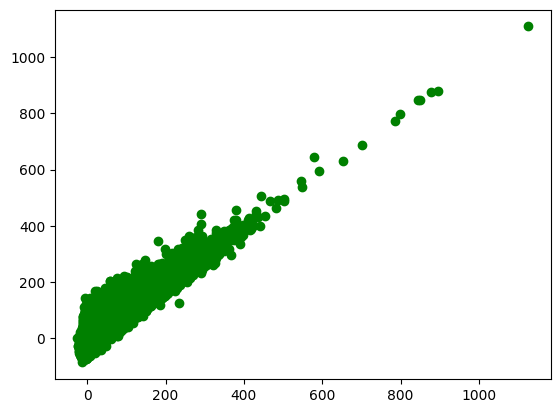

In [144]:
# Tương quan với cột arr_delay
plt.scatter(dep_delay_EWR, arr_delay_EWR, color = 'g')
plt.show()

In [145]:
cov = np.cov(dep_delay_EWR, arr_delay_EWR)
print(cov)

[[1696.22136229 1739.45984472]
 [1739.45984472 2072.90653348]]


In [146]:
corr = np.corrcoef(dep_delay_EWR, arr_delay_EWR)
print(corr)

[[1.         0.92764815]
 [0.92764815 1.        ]]


# Cột arr_delay

In [147]:
fdata_EWR = fdata[fdata['origin'] == 'EWR']
dep_delay_EWR = fdata_EWR['dep_delay'].values
air_time_EWR = fdata_EWR['air_time'].values
arr_delay_EWR = fdata_EWR['arr_delay'].values
distance_EWR = fdata_EWR['distance'].values
arr_time_EWR = fdata_EWR['arr_time'].values

In [148]:
# Tứ phân vị
q1 = np.quantile(arr_delay_EWR, 0.25)
q2 =  np.quantile(arr_delay_EWR, 0.5)
q3 =  np.quantile(arr_delay_EWR, 0.75)
iqr = q3 - q1
lowerquartile = q1 - 1.5 * iqr
upperquartile = q3 + 1.5 * iqr

In [149]:
# Độ đo về sự mở rộng
mean_EWR = np.mean(arr_delay_EWR)
median_EWR = np.median(arr_delay_EWR)
min_EWR = np.min(arr_delay_EWR)
max_EWR = np.max(arr_delay_EWR)
ptp_EWR = np.ptp(arr_delay_EWR)
var_EWR = np.var(arr_delay_EWR)
std_EWR = np.std(arr_delay_EWR)
unique_EWR = len(np.unique(arr_delay_EWR))
count_EWR = len(arr_delay_EWR)
print(f'mean_EWR: {mean_EWR}')
print(f'median_EWR: {median_EWR}')
print(f'min_EWR: {min_EWR}')
print(f'max_EWR: {max_EWR}')
print(f'ptp_EWR: {ptp_EWR}')
print(f'var_EWR: {var_EWR}')
print(f'std_EWR: {std_EWR}')
print(f'unique_EWR: {unique_EWR}')
print(f'count_EWR: {count_EWR}')

mean_EWR: 9.107054735458092
median_EWR: -4.0
min_EWR: -86.0
max_EWR: 1109.0
ptp_EWR: 1195.0
var_EWR: 2072.8888355432314
std_EWR: 45.5289889580609
unique_EWR: 491
count_EWR: 117127


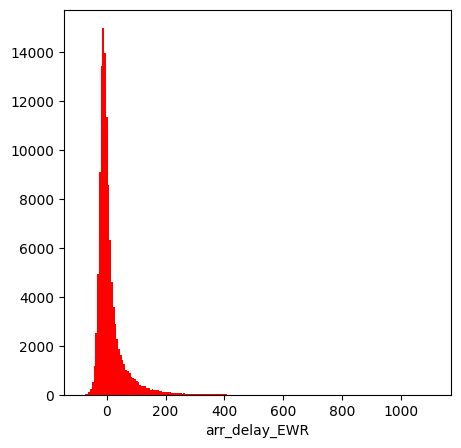

In [150]:
# Khuynh hướng tập trung
fig, ax = plt.subplots(figsize = [5,5])
ax.hist(arr_delay_EWR, bins = 200, color = 'r')
ax.set_xlabel('arr_delay_EWR')
plt.show()

In [151]:
# Outlier
print(arr_delay_EWR[(arr_delay_EWR < lowerquartile)])
print(arr_delay_EWR[(arr_delay_EWR > upperquartile)])

[-68. -70. -70. -70. -68. -65. -65. -73. -75. -65. -67. -74. -69. -86.
 -71. -65. -65. -69. -68. -66. -68. -70. -65. -66. -66. -65. -67. -67.
 -67. -65.]
[123.  78.  73. ... 137. 174. 136.]


In [152]:
arr_delay_EWR_new = arr_delay_EWR[(arr_delay_EWR > lowerquartile) & (arr_delay_EWR < upperquartile)]
print(arr_delay_EWR_new)

[ 11.  12.  19. ... -16.  57.  42.]


In [153]:
#mean, median, mode của dep_delay_EWR_new
mean = np.mean(arr_delay_EWR_new)
median = np.median(arr_delay_EWR_new)
h = np.histogram(arr_delay_EWR_new, bins = 20)
counts, bins = h
mode_idx = np.argmax(counts)
mode = np.mean([bins[mode_idx], bins[mode_idx + 1]])
print(f'Mean: {mean}')
print(f'Median: {median}')
print(f'Mode: {mode}')

Mean: -2.148179079827714
Median: -6.0
Mode: -9.450000000000003


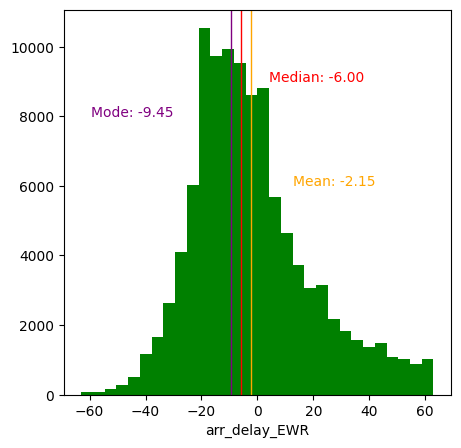

In [154]:
fig, ax = plt.subplots(figsize = [5,5])
ax.hist(arr_delay_EWR_new, bins = 30, color = 'g')
ax.set_xlabel('arr_delay_EWR')

ax.axvline(mean, color = 'orange', ls = '-', lw = 1)
ax.text(mean + 15, 6000, f'Mean: {mean:.2f}', color = 'orange')

ax.axvline(median, color = 'red', ls = '-', lw = 1)
ax.text(median + 10, 9000, f'Median: {median:.2f}', color = 'red')

ax.axvline(mode, color = 'purple', ls = '-', lw = 1)
ax.text(mode - 50, 8000, f'Mode: {mode:.2f}', color = 'purple')

plt.show()

In [155]:
# Dạng phân bố
skew = stats.skew(arr_delay_EWR_new)
kurtosis = stats.kurtosis(arr_delay_EWR_new)
print(f'skew: {skew}')
print(f'kurtosis: {kurtosis}')

skew: 0.7596231618599715
kurtosis: 0.4943069885932698


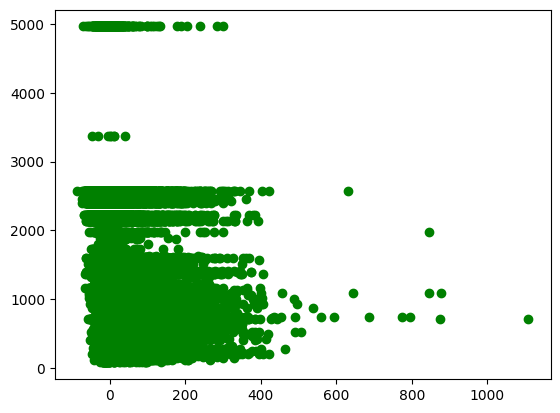

In [156]:
# Tương quan với cột distance
plt.scatter(arr_delay_EWR, distance_EWR, color = 'g')
plt.show()

In [157]:
cov = np.cov(arr_delay_EWR, distance_EWR)
print(cov)

[[  2072.90653348  -2790.44891327]
 [ -2790.44891327 538205.01488901]]


In [158]:
corr = np.corrcoef(arr_delay_EWR, distance_EWR)
print(corr)

[[ 1.         -0.08354305]
 [-0.08354305  1.        ]]


# Cột Distance

In [159]:
fdata_EWR = fdata[fdata['origin'] == 'EWR']
dep_delay_EWR = fdata_EWR['dep_delay'].values
air_time_EWR = fdata_EWR['air_time'].values
arr_delay_EWR = fdata_EWR['arr_delay'].values
distance_EWR = fdata_EWR['distance'].values
arr_time_EWR = fdata_EWR['arr_time'].values

In [160]:
# Tứ phân vị
q1 = np.quantile(distance_EWR, 0.25)
q2 =  np.quantile(distance_EWR, 0.5)
q3 =  np.quantile(distance_EWR, 0.75)
iqr = q3 - q1
lowerquartile = q1 - 1.5 * iqr
upperquartile = q3 + 1.5 * iqr

In [161]:
# Độ đo về sự mở rộng
mean_EWR = np.mean(distance_EWR)
median_EWR = np.median(distance_EWR)
min_EWR = np.min(distance_EWR)
max_EWR = np.max(distance_EWR)
ptp_EWR = np.ptp(distance_EWR)
var_EWR = np.var(distance_EWR)
std_EWR = np.std(distance_EWR)
unique_EWR = len(np.unique(arr_delay_EWR))
count_EWR = len(distance_EWR)
print(f'mean_EWR: {mean_EWR}')
print(f'median_EWR: {median_EWR}')
print(f'min_EWR: {min_EWR}')
print(f'max_EWR: {max_EWR}')
print(f'ptp_EWR: {ptp_EWR}')
print(f'var_EWR: {var_EWR}')
print(f'std_EWR: {std_EWR}')
print(f'unique_EWR: {unique_EWR}')
print(f'count_EWR: {count_EWR}')

mean_EWR: 1064.7521664518001
median_EWR: 872.0
min_EWR: 80
max_EWR: 4963
ptp_EWR: 4883
var_EWR: 538200.4198339218
std_EWR: 733.6214417762895
unique_EWR: 491
count_EWR: 117127


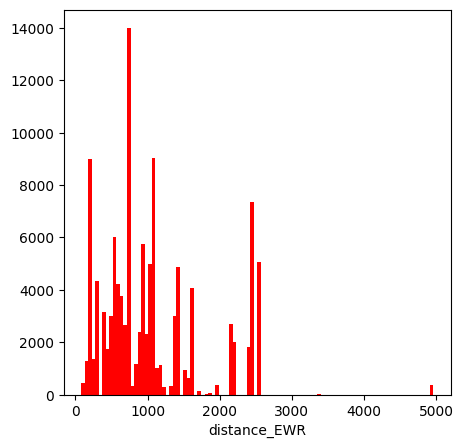

In [162]:
# Khuynh hướng tập trung
fig, ax = plt.subplots(figsize = [5,5])
ax.hist(distance_EWR, bins = 100, color = 'r')
ax.set_xlabel('distance_EWR')
plt.show()

In [163]:
# Outlier
print(distance_EWR[(distance_EWR < lowerquartile)])
print(distance_EWR[(distance_EWR > upperquartile)])

[]
[4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963
 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963
 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963
 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963
 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963
 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963
 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963
 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963
 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963
 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963
 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963
 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963
 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963
 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963
 49

In [164]:
distance_EWR_new = distance_EWR[(distance_EWR > lowerquartile) & (distance_EWR < upperquartile)]
print(distance_JFK_new)

[1089 1576  944 ...  264  187 1617]


In [165]:
#mean, median, mode của distance_EWR_new
mean = np.mean(distance_EWR_new)
median = np.median(distance_EWR_new)
h = np.histogram(distance_EWR_new, bins = 20)
counts, bins = h
mode_idx = np.argmax(counts)
mode = np.mean([bins[mode_idx], bins[mode_idx + 1]])
print(f'Mean: {mean}')
print(f'Median: {median}')
print(f'Mode: {mode}')

Mean: 1052.6083418979103
Median: 872.0
Mode: 763.375


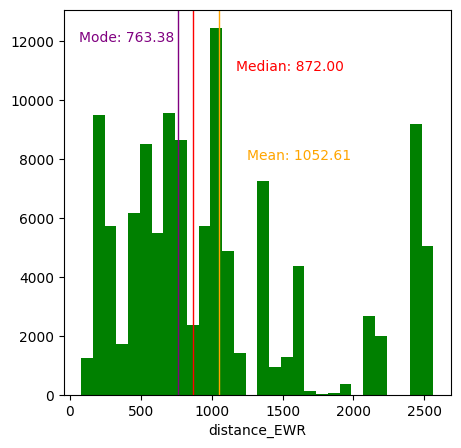

In [166]:
fig, ax = plt.subplots(figsize = [5,5])
ax.hist(distance_EWR_new, bins = 30, color = 'g')
ax.set_xlabel('distance_EWR')

ax.axvline(mean, color = 'orange', ls = '-', lw = 1)
ax.text(mean + 200, 8000, f'Mean: {mean:.2f}', color = 'orange')

ax.axvline(median, color = 'red', ls = '-', lw = 1)
ax.text(median + 300, 11000, f'Median: {median:.2f}', color = 'red')

ax.axvline(mode, color = 'purple', ls = '-', lw = 1)
ax.text(mode - 700, 12000, f'Mode: {mode:.2f}', color = 'purple')

plt.show()

In [167]:
# Dạng phân bố
skew = stats.skew(distance_EWR_new)
kurtosis = stats.kurtosis(distance_EWR_new)
print(f'skew: {skew}')
print(f'kurtosis: {kurtosis}')

skew: 0.9064112011479569
kurtosis: -0.2273509141952843


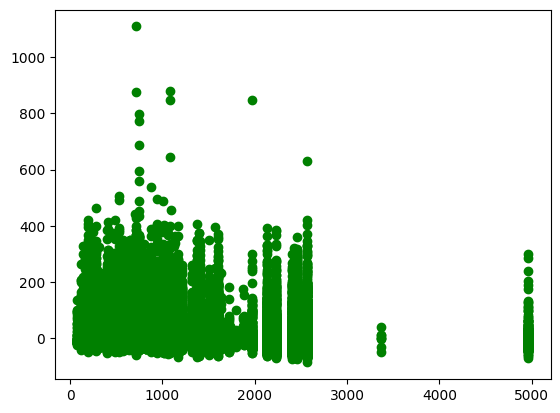

In [168]:
# Tương quan với cột arr_delay
plt.scatter(distance_EWR, arr_delay_EWR, color = 'g')
plt.show()

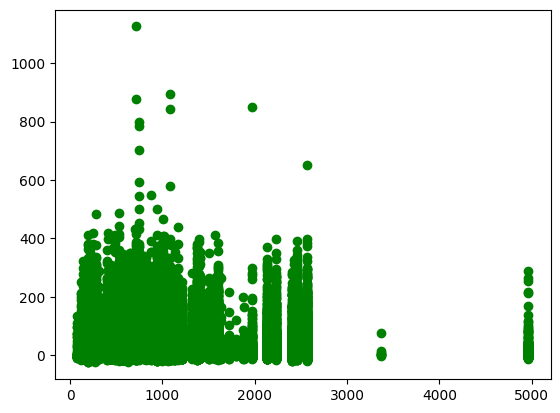

In [169]:
# Tương quan với cột dep_delay
plt.scatter(distance_EWR, dep_delay_EWR, color = 'g')
plt.show()

In [170]:
cov1 = np.cov(distance_EWR, arr_delay_EWR)
print(cov1)
cov2 = np.cov(distance_EWR, dep_delay_EWR)
print(cov2)

[[538205.01488901  -2790.44891327]
 [ -2790.44891327   2072.90653348]]
[[538205.01488901  -1102.50884997]
 [ -1102.50884997   1696.22136229]]


In [171]:
corr1 = np.corrcoef(distance_EWR, arr_delay_EWR)
print(corr1)
corr2 = np.corrcoef(distance_EWR, dep_delay_EWR)
print(corr2)

[[ 1.         -0.08354305]
 [-0.08354305  1.        ]]
[[ 1.         -0.03648942]
 [-0.03648942  1.        ]]


# Mô hình linear regression dự đoán thời gian đến trễ dựa vào thời gian xuất phát và khoảng cách đối với sân bay EWR

In [172]:
# Tứ phân vị
q1_dep_delay_EWR = np.quantile(dep_delay_EWR, 0.25)
q2_dep_delay_EWR =  np.quantile(dep_delay_EWR, 0.5)
q3_dep_delay_EWR =  np.quantile(dep_delay_EWR, 0.75)
iqr_dep_delay_EWR = q3_dep_delay_EWR - q1_dep_delay_EWR
lowerquartile_dep_delay_EWR = q1_dep_delay_EWR - 1.5 * iqr_dep_delay_EWR
upperquartile_dep_delay_EWR = q3_dep_delay_EWR + 1.5 * iqr_dep_delay_EWR

q1_arr_delay_EWR = np.quantile(arr_delay_EWR, 0.25)
q2_arr_delay_EWR =  np.quantile(arr_delay_EWR, 0.5)
q3_arr_delay_EWR =  np.quantile(arr_delay_EWR, 0.75)
iqr_arr_delay_EWR = q3_arr_delay_EWR - q1_arr_delay_EWR
lowerquartile_arr_delay_EWR = q1_arr_delay_EWR - 1.5 * iqr_arr_delay_EWR
upperquartile_arr_delay_EWR = q3_arr_delay_EWR + 1.5 * iqr_arr_delay_EWR

q1_distance_EWR = np.quantile(distance_EWR, 0.25)
q2_distance_EWR =  np.quantile(distance_EWR, 0.5)
q3_distance_EWR =  np.quantile(distance_EWR, 0.75)
iqr_distance_EWR = q3_distance_EWR - q1_distance_EWR
lowerquartile_distance_EWR = q1_distance_EWR - 1.5 * iqr_distance_EWR
upperquartile_distance_EWR = q3_distance_EWR + 1.5 * iqr_distance_EWR


In [173]:
# Xử lý outlier
fdata_EWR_new = fdata_EWR[(fdata_EWR['dep_delay'] > lowerquartile_dep_delay_EWR) & (fdata_EWR['dep_delay'] < upperquartile_dep_delay_EWR)]
fdata_EWR_new = fdata_EWR_new[(fdata_EWR_new['arr_delay'] > lowerquartile_arr_delay_EWR) & (fdata_EWR_new['arr_delay'] < upperquartile_arr_delay_EWR)]
fdata_EWR_new = fdata_EWR_new[(fdata_EWR_new['distance'] > lowerquartile_distance_EWR) & (fdata_EWR_new['distance'] < upperquartile_distance_EWR)]
fdata_EWR_final = fdata_EWR_new[['dep_delay', 'distance', 'arr_delay']]
fdata_EWR_final.reset_index(inplace = True, drop = True)
display(fdata_EWR_final)

,dep_delay,distance,arr_delay
0,2.0,1400,11.0
1,-4.0,719,12.0
2,-5.0,1065,19.0
3,-2.0,2565,-14.0
4,-1.0,2227,-8.0
...,...,...,...
101014,-5.0,199,-11.0
101015,-2.0,529,-9.0
101016,13.0,284,11.0
101017,-7.0,200,-23.0


In [174]:
fdata_EWR_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101019 entries, 0 to 101018
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   dep_delay  101019 non-null  float64
 1   distance   101019 non-null  int64  
 2   arr_delay  101019 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 2.3 MB


In [175]:
# Xử lý cột dep_delay
dep_delay_EWR = fdata_EWR_final['dep_delay'].values
mean_dep_delay_EWR = np.mean(dep_delay_EWR)
std_dep_delay_EWR = np.std(dep_delay_EWR)
print(f'mean_dep_delay_EWR: {round(mean_dep_delay_EWR,2)}, \nstd_dep_delay_EWR: {round(std_dep_delay_EWR,2)}')
dep_delay_EWR_standardize = (dep_delay_EWR - mean_dep_delay_EWR) / std_dep_delay_EWR
print(f'dep_delay_EWR_standardize: {dep_delay_EWR_standardize}')

# Xử lý cột distance
distance_EWR = fdata_EWR_final['distance'].values
mean_distance_EWR = np.mean(distance_EWR)
std_distance_EWR = np.std(distance_EWR)
print(f'mean_distance_EWR: {round(mean_distance_EWR,2)}, \nstd_distance_EWR: {round(std_distance_EWR,2)}')
distance_EWR_standardize = (distance_EWR - mean_distance_EWR) / std_distance_EWR
print(f'distance_EWR_standardize: {distance_EWR_standardize}')

mean_dep_delay_EWR: 2.25, 
std_dep_delay_EWR: 11.38
dep_delay_EWR_standardize: [-0.02172359 -0.54903533 -0.63692062 ...  0.9450146  -0.8126912
 -0.98846178]
mean_distance_EWR: 1068.33, 
std_distance_EWR: 706.68
distance_EWR_standardize: [ 0.46932853 -0.49432587 -0.00471585 ... -1.10987603 -1.22874089
 -1.21600537]


In [176]:
# thông số sau chuẩn hóa
# Chuẩn hóa cột dep_delay bằng standardscaler
mean_dep_delay_EWR_standardize = round(np.mean(dep_delay_EWR_standardize),2)
median_dep_delay_EWR_standardize = round(np.median(dep_delay_EWR_standardize),2)
min_dep_delay_EWR_standardize = round(np.min(dep_delay_EWR_standardize),2)
max_dep_delay_EWR_standardize = round(np.max(dep_delay_EWR_standardize),2)
ptp_dep_delay_EWR_standardize = round(np.ptp(dep_delay_EWR_standardize),2)
var_dep_delay_EWR_standardize = round(np.var(dep_delay_EWR_standardize),2)
std_dep_delay_EWR_standardize = round(np.std(dep_delay_EWR_standardize),2)
unique_dep_delay_EWR_standardize = len(np.unique(dep_delay_EWR_standardize))
count_dep_delay_EWR_standardize = len(dep_delay_EWR_standardize)
print(f'mean_dep_delay_EWR_standardize: {mean_dep_delay_EWR_standardize}')
print(f'median_dep_delay_EWR_standardize: {median_dep_delay_EWR_standardize}')
print(f'min_dep_delay_EWR_standardize: {min_dep_delay_EWR_standardize}')
print(f'max_dep_delay_EWR_standardize: {max_dep_delay_EWR_standardize}')
print(f'ptp_dep_delay_EWR_standardize: {ptp_dep_delay_EWR_standardize}')
print(f'var_dep_delay_EWR_standardize: {var_dep_delay_EWR_standardize}')
print(f'std_dep_delay_EWR_standardize: {std_dep_delay_EWR_standardize}')
print(f'unique_dep_delay_EWR_standardize: {unique_dep_delay_EWR_standardize}')
print(f'count_dep_delay_EWR_standardize: {count_dep_delay_EWR_standardize}')

print('+=' * 20)

# Chuẩn hóa cột distance bằng standardscaler
mean_distance_EWR_standardize = round(np.mean(distance_EWR_standardize),2)
median_distance_EWR_standardize = round(np.median(distance_EWR_standardize),2)
min_distance_EWR_standardize = round(np.min(distance_EWR_standardize),2)
max_distance_EWR_standardize = round(np.max(distance_EWR_standardize),2)
ptp_distance_EWR_standardize = round(np.ptp(distance_EWR_standardize),2)
var_distance_EWR_standardize = round(np.var(distance_EWR_standardize),2)
std_distance_EWR_standardize = round(np.std(distance_EWR_standardize),2)
unique_distance_EWR_standardize = len(np.unique(distance_EWR_standardize))
count_distance_EWR_standardize = len(distance_EWR_standardize)
print(f'mean_distance_EWR_standardize: {mean_distance_EWR_standardize}')
print(f'median_distance_EWR_standardize: {median_distance_EWR_standardize}')
print(f'min_distance_EWR_standardize: {min_distance_EWR_standardize}')
print(f'max_distance_EWR_standardize: {max_distance_EWR_standardize}')
print(f'ptp_distance_EWR_standardize: {ptp_distance_EWR_standardize}')
print(f'var_distance_EWR_standardize: {var_distance_EWR_standardize}')
print(f'std_distance_EWR_standardize: {std_distance_EWR_standardize}')
print(f'unique_distance_EWR_standardize: {unique_distance_EWR_standardize}')
print(f'count_distance_EWR_standardize: {count_distance_EWR_standardize}')

mean_dep_delay_EWR_standardize: 0.0
median_dep_delay_EWR_standardize: -0.37
min_dep_delay_EWR_standardize: -2.39
max_dep_delay_EWR_standardize: 3.58
ptp_dep_delay_EWR_standardize: 5.98
var_dep_delay_EWR_standardize: 1.0
std_dep_delay_EWR_standardize: 1.0
unique_dep_delay_EWR_standardize: 68
count_dep_delay_EWR_standardize: 101019
+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=
mean_distance_EWR_standardize: -0.0
median_distance_EWR_standardize: -0.19
min_distance_EWR_standardize: -1.4
max_distance_EWR_standardize: 2.12
ptp_distance_EWR_standardize: 3.52
var_distance_EWR_standardize: 1.0
std_distance_EWR_standardize: 1.0
unique_distance_EWR_standardize: 82
count_distance_EWR_standardize: 101019


In [177]:
dep_delay_EWR_standardize = pd.Series(dep_delay_EWR_standardize)
distance_EWR_standardize = pd.Series(distance_EWR_standardize)
fdata_EWR_final['dep_delay_EWR_standardize'] = dep_delay_EWR_standardize
fdata_EWR_final['distance_EWR_standardize'] = distance_EWR_standardize

In [178]:
fdatafinal_EWR_standardize = fdata_EWR_final
display(fdatafinal_EWR_standardize)

,dep_delay,distance,arr_delay,dep_delay_EWR_standardize,distance_EWR_standardize
0,2.0,1400,11.0,-0.021724,0.469329
1,-4.0,719,12.0,-0.549035,-0.494326
2,-5.0,1065,19.0,-0.636921,-0.004716
3,-2.0,2565,-14.0,-0.373265,2.117871
4,-1.0,2227,-8.0,-0.285379,1.639581
...,...,...,...,...,...
101014,-5.0,199,-11.0,-0.636921,-1.230156
101015,-2.0,529,-9.0,-0.373265,-0.763187
101016,13.0,284,11.0,0.945015,-1.109876
101017,-7.0,200,-23.0,-0.812691,-1.228741


In [179]:
X = fdatafinal_EWR_standardize[['dep_delay_EWR_standardize', 'distance_EWR_standardize']].values
Y = fdatafinal_EWR_standardize['arr_delay'].values
print(X)
print(Y)

[[-0.02172359  0.46932853]
 [-0.54903533 -0.49432587]
 [-0.63692062 -0.00471585]
 ...
 [ 0.9450146  -1.10987603]
 [-0.8126912  -1.22874089]
 [-0.98846178 -1.21600537]]
[ 11.  12.  19. ...  11. -23. -16.]


In [180]:
np.random.seed(3)
rand_indices = np.arange(fdatafinal_EWR_standardize.index.values[-1] + 1)
np.random.shuffle(rand_indices) #xáo trộn trước khi phân ra 2 tập train và test

print(rand_indices.size)
print(rand_indices)

101019
[95612 80162 42580 ... 77049 67224 71530]


In [181]:
N_TRAIN = round(0.7*len(rand_indices))
train_indices = rand_indices[0:N_TRAIN]
test_indices = rand_indices[N_TRAIN:]
print(test_indices)
print(len(test_indices))
print(train_indices)
print(len(train_indices))

[89893 15732 32384 ... 77049 67224 71530]
30306
[95612 80162 42580 ... 37567 21468 54940]
70713


In [182]:
x_train, y_train = X[train_indices], Y[train_indices]
print(x_train.shape, y_train.shape)

(70713, 2) (70713,)


In [183]:
x_test, y_test = X[test_indices], Y[test_indices]
print(x_test.shape, y_test.shape)

(30306, 2) (30306,)


In [184]:
model = LinearRegression()
model.fit(x_train, y_train)
a = model.coef_
b = model.intercept_
s = x_train[3]
y0_predict1 = np.sum(s*a) + b
print(a)
print(b)
print(y0_predict1)

[11.36348203 -2.24070332]
-4.578604148082855
-12.215078521220079


In [185]:
y_hat = model.predict(x_test)
print(y_hat.shape)
print(y_hat)

(30306,)
[-18.55912646 -10.83850691  14.76847993 ... -10.052835   -15.56307772
  -9.78303717]


In [186]:
r2 = model.score(x_train, y_train)
print(f'r2: {r2}')
q2 = model.score(x_test, y_test)
print(f'q2: {q2}') 

r2: 0.3707151387219175
q2: 0.37219621721908314


In [187]:
err = y_hat - y_test
rmse = np.sqrt((np.sum((y_test - y_hat)**2))/len(y_test - y_hat))
print(f'y_hat: {y_hat}')
print(f'y_test: {y_test}')
print(f'err: {err}')
print(f'rmse: {rmse}')

y_hat: [-18.55912646 -10.83850691  14.76847993 ... -10.052835   -15.56307772
  -9.78303717]
y_test: [-14.  -4.   5. ... -20. -25.  -8.]
err: [-4.55912646 -6.83850691  9.76847993 ...  9.947165    9.43692228
 -1.78303717]
rmse: 14.996637229474247


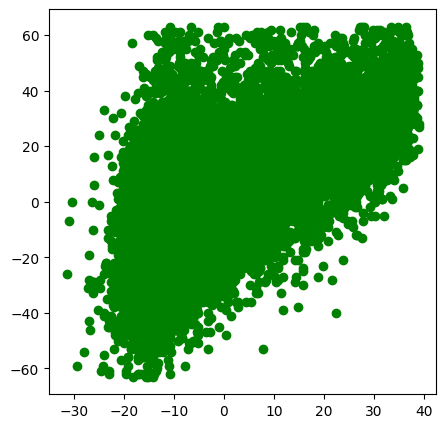

In [188]:
# Scatter plot
plt.figure(figsize=[5,5]) 
plt.scatter(y_hat, y_test, color = 'g') #Nếu kết quả dự đoán hoàn hảo thì biểu đồ scatter
# sẽ nằm trên đường chéo của hình vuông
plt.show()

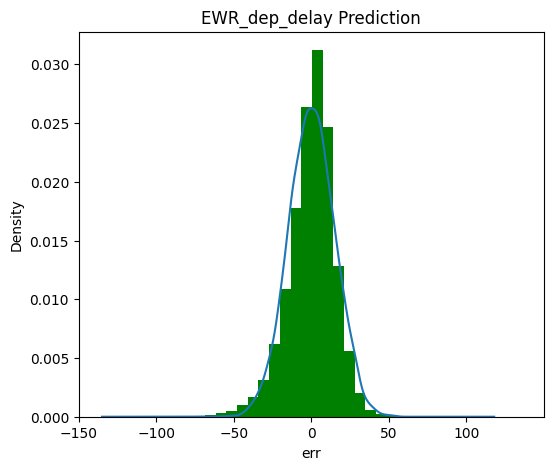

skew: -0.6432452137142305
kurtosis: 1.3845318753018336


In [189]:
def plot_error(err, bins=10):
    mean, std = np.mean(err), np.std(err)
    
    plt.figure(figsize=[6,5])    
    plt.title("EWR_dep_delay Prediction")
    plt.xlim([mean - 10*std,mean + 10*std])
    plt.hist(err, density=True, bins=bins, color='g')
    
    norm_dist = np.random.normal(mean, std, 10000)
    pd.Series(norm_dist).plot.kde()
    plt.xlabel('err')
    
    plt.show()
    
    skew = stats.skew(err)
    kurtosis = stats.kurtosis(err)
    print(f'skew: {skew}')
    print(f'kurtosis: {kurtosis}')
plot_error(err, bins=20)

In [190]:
# CI 95%
np.percentile(err, [2.5, 97.5])

array([-34.41068657,  26.31103348])

# Thực hiện phân tích cho sân bay LGA

# Cột dep_delay

In [191]:
fdata_LGA = fdata[fdata['origin'] == 'LGA']
dep_delay_LGA = fdata_LGA['dep_delay'].values
air_time_LGA = fdata_LGA['air_time'].values
arr_delay_LGA = fdata_LGA['arr_delay'].values
distance_LGA = fdata_LGA['distance'].values
arr_time_LGA = fdata_LGA['arr_time'].values

In [192]:
# Tứ phân vị
q1 = np.quantile(arr_delay_LGA, 0.25)
q2 =  np.quantile(arr_delay_LGA, 0.5)
q3 =  np.quantile(arr_delay_LGA, 0.75)
iqr = q3 - q1
lowerquartile = q1 - 1.5 * iqr
upperquartile = q3 + 1.5 * iqr

In [193]:
# Độ đo về sự mở rộng
mean_LGA = np.mean(dep_delay_LGA)
median_LGA = np.median(dep_delay_LGA)
min_LGA = np.min(dep_delay_LGA)
max_LGA = np.max(dep_delay_LGA)
ptp_LGA = np.ptp(dep_delay_LGA)
var_LGA = np.var(dep_delay_LGA)
std_LGA = np.std(dep_delay_LGA)
unique_LGA = len(np.unique(dep_delay_LGA))
count_LGA = len(dep_delay_LGA)
print(f'mean_LGA: {mean_LGA}')
print(f'median_LGA: {median_LGA}')
print(f'min_LGA: {min_LGA}')
print(f'max_LGA: {max_LGA}')
print(f'ptp_LGA: {ptp_LGA}')
print(f'var_LGA: {var_LGA}')
print(f'std_LGA: {std_LGA}')
print(f'unique_LGA: {unique_LGA}')
print(f'count_LGA: {count_LGA}')

mean_LGA: 10.286582954320744
median_LGA: -3.0
min_LGA: -33.0
max_LGA: 911.0
ptp_LGA: 944.0
var_LGA: 1592.895989648695
std_LGA: 39.9111010828904
unique_LGA: 466
count_LGA: 101140


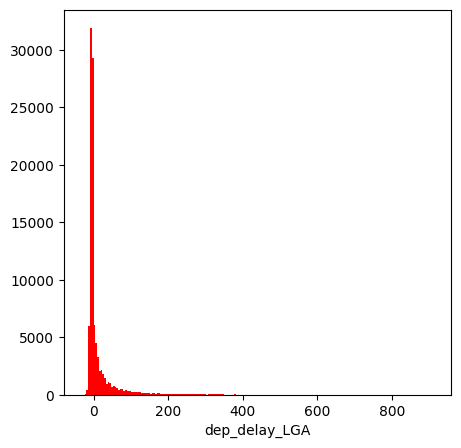

In [194]:
# Khuynh hướng tập trung
fig, ax = plt.subplots(figsize = [5,5])
ax.hist(dep_delay_LGA, bins = 200, color = 'r')
ax.set_xlabel('dep_delay_LGA')
plt.show()

In [195]:
# Outlier
print(dep_delay_LGA[(dep_delay_LGA < lowerquartile)])
print(dep_delay_LGA[(dep_delay_LGA > upperquartile)])

[]
[101. 134.  71. ... 225. 294.  93.]


In [196]:
dep_delay_LGA_new = dep_delay_LGA[(dep_delay_LGA > lowerquartile) & (dep_delay_LGA < upperquartile)]
print(dep_delay_LGA_new)

[ 4. -6. -3. ... 10. -2. 27.]


In [197]:
#mean, median, mode của dep_delay_LGA_new
mean = np.mean(dep_delay_LGA_new)
median = np.median(dep_delay_LGA_new)
h = np.histogram(dep_delay_LGA_new, bins = 20)
counts, bins = h
mode_idx = np.argmax(counts)
mode = np.mean([bins[mode_idx], bins[mode_idx + 1]])
print(f'Mean: {mean}')
print(f'Median: {median}')
print(f'Mode: {mode}')

Mean: 0.978076053046303
Median: -3.0
Mode: -4.399999999999997


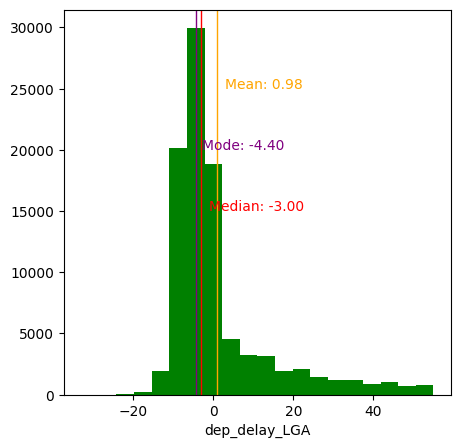

In [198]:
fig, ax = plt.subplots(figsize = [5,5])
ax.hist(dep_delay_LGA_new, bins = 20, color = 'g')
ax.set_xlabel('dep_delay_LGA')

ax.axvline(mean, color = 'orange', ls = '-', lw = 1)
ax.text(mean + 2, 25000, f'Mean: {mean:.2f}', color = 'orange')

ax.axvline(median, color = 'red', ls = '-', lw = 1)
ax.text(median + 2, 15000, f'Median: {median:.2f}', color = 'red')

ax.axvline(mode, color = 'purple', ls = '-', lw = 1)
ax.text(mode + 1.5, 20000, f'Mode: {mode:.2f}', color = 'purple')

plt.show()

In [199]:
# Dạng phân bố
skew = stats.skew(dep_delay_LGA_new)
kurtosis = stats.kurtosis(dep_delay_LGA_new)
print(f'skew: {skew}')
print(f'kurtosis: {kurtosis}')

skew: 2.08529635464837
kurtosis: 4.1618778226770115


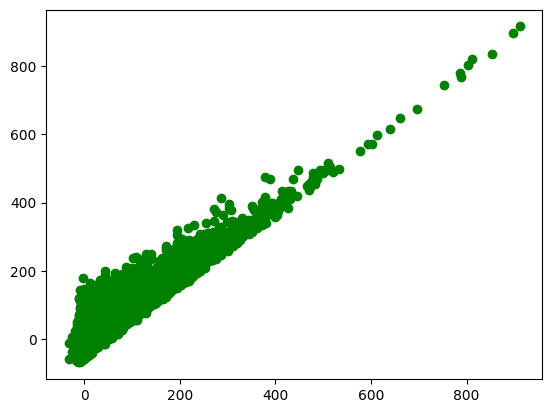

In [200]:
# Tương quan với cột arr_delay
plt.scatter(dep_delay_LGA, arr_delay_LGA, color = 'g')
plt.show()

In [201]:
cov = np.cov(dep_delay_LGA, arr_delay_LGA)
print(cov)

[[1592.91173922 1598.47613278]
 [1598.47613278 1923.89901843]]


In [202]:
corr = np.corrcoef(dep_delay_LGA, arr_delay_LGA)
print(corr)

[[1.         0.91310172]
 [0.91310172 1.        ]]


# Cột arr_delay

In [203]:
fdata_LGA = fdata[fdata['origin'] == 'LGA']
dep_delay_LGA = fdata_LGA['dep_delay'].values
air_time_LGA = fdata_LGA['air_time'].values
arr_delay_LGA = fdata_LGA['arr_delay'].values
distance_LGA = fdata_LGA['distance'].values
arr_time_LGA = fdata_LGA['arr_time'].values

In [204]:
# Tứ phân vị
q1 = np.quantile(arr_delay_LGA, 0.25)
q2 =  np.quantile(arr_delay_LGA, 0.5)
q3 =  np.quantile(arr_delay_LGA, 0.75)
iqr = q3 - q1
lowerquartile = q1 - 1.5 * iqr
upperquartile = q3 + 1.5 * iqr

In [205]:
# Độ đo về sự mở rộng
mean_LGA = np.mean(arr_delay_LGA)
median_LGA = np.median(arr_delay_LGA)
min_LGA = np.min(arr_delay_LGA)
max_LGA = np.max(arr_delay_LGA)
ptp_LGA = np.ptp(arr_delay_LGA)
var_LGA = np.var(arr_delay_LGA)
std_LGA = np.std(arr_delay_LGA)
unique_LGA = len(np.unique(arr_delay_LGA))
count_LGA = len(arr_delay_LGA)
print(f'mean_LGA: {mean_LGA}')
print(f'median_LGA: {median_LGA}')
print(f'min_LGA: {min_LGA}')
print(f'max_LGA: {max_LGA}')
print(f'ptp_LGA: {ptp_LGA}')
print(f'var_LGA: {var_LGA}')
print(f'std_LGA: {std_LGA}')
print(f'unique_LGA: {unique_LGA}')
print(f'count_LGA: {count_LGA}')

mean_LGA: 5.783488234130908
median_LGA: -5.0
min_LGA: -68.0
max_LGA: 915.0
ptp_LGA: 983.0
var_LGA: 1923.8799962957385
std_LGA: 43.8620564531092
unique_LGA: 489
count_LGA: 101140


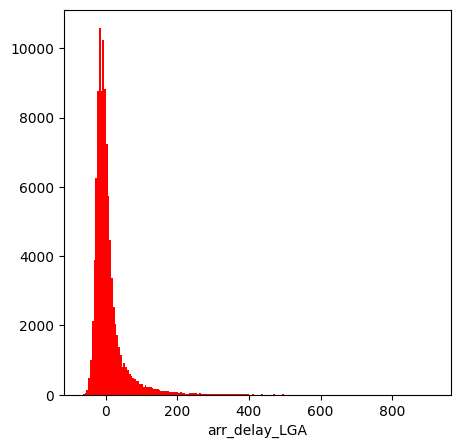

In [206]:
# Khuynh hướng tập trung
fig, ax = plt.subplots(figsize = [5,5])
ax.hist(arr_delay_LGA, bins = 200, color = 'r')
ax.set_xlabel('arr_delay_LGA')
plt.show()

In [207]:
# Outlier
print(arr_delay_LGA[(arr_delay_LGA < lowerquartile)])
print(arr_delay_LGA[(arr_delay_LGA > upperquartile)])

[-67. -62. -61. -63. -63. -62. -62. -68. -61.]
[137. 145.  81. ...  58. 272. 105.]


In [208]:
arr_delay_LGA_new = arr_delay_LGA[(arr_delay_LGA > lowerquartile) & (arr_delay_LGA < upperquartile)]
print(arr_delay_LGA_new)

[ 20. -25. -14. ...   3.   8.   7.]


In [209]:
#mean, median, mode của dep_delay_LGA_new
mean = np.mean(arr_delay_LGA_new)
median = np.median(arr_delay_LGA_new)
h = np.histogram(arr_delay_LGA_new, bins = 20)
counts, bins = h
mode_idx = np.argmax(counts)
mode = np.mean([bins[mode_idx], bins[mode_idx + 1]])
print(f'Mean: {mean}')
print(f'Median: {median}')
print(f'Mode: {mode}')

Mean: -4.549485326679844
Median: -7.0
Mode: -11.125


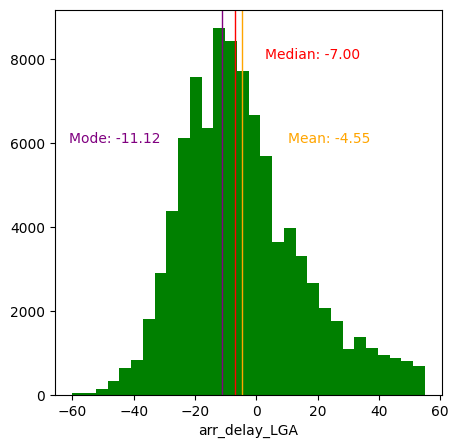

In [210]:
fig, ax = plt.subplots(figsize = [5,5])
ax.hist(arr_delay_LGA_new, bins = 30, color = 'g')
ax.set_xlabel('arr_delay_LGA')

ax.axvline(mean, color = 'orange', ls = '-', lw = 1)
ax.text(mean + 15, 6000, f'Mean: {mean:.2f}', color = 'orange')

ax.axvline(median, color = 'red', ls = '-', lw = 1)
ax.text(median + 10, 8000, f'Median: {median:.2f}', color = 'red')

ax.axvline(mode, color = 'purple', ls = '-', lw = 1)
ax.text(mode - 50, 6000, f'Mode: {mode:.2f}', color = 'purple')

plt.show()

In [211]:
# Dạng phân bố
skew = stats.skew(arr_delay_LGA_new)
kurtosis = stats.kurtosis(arr_delay_LGA_new)
print(f'skew: {skew}')
print(f'kurtosis: {kurtosis}')

skew: 0.6659269693288834
kurtosis: 0.3003389053052765


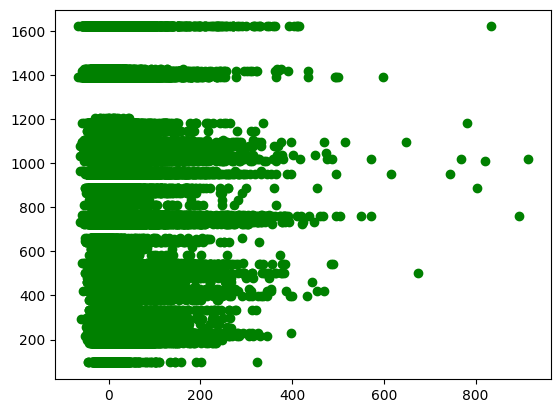

In [212]:
# Tương quan với cột distance
plt.scatter(arr_delay_LGA, distance_LGA, color = 'g')
plt.show()

In [213]:
cov = np.cov(arr_delay_LGA, distance_LGA)
print(cov)

[[  1923.89901843   -248.51174815]
 [  -248.51174815 137666.37986309]]


In [214]:
corr = np.corrcoef(arr_delay_LGA, distance_LGA)
print(corr)

[[ 1.        -0.0152701]
 [-0.0152701  1.       ]]


# Cột Distance

In [215]:
fdata_LGA = fdata[fdata['origin'] == 'LGA']
dep_delay_LGA = fdata_EWR['dep_delay'].values
air_time_LGA = fdata_EWR['air_time'].values
arr_delay_LGA = fdata_EWR['arr_delay'].values
distance_LGA = fdata_EWR['distance'].values
arr_time_LGA = fdata_EWR['arr_time'].values

In [216]:
# Tứ phân vị
q1 = np.quantile(distance_LGA, 0.25)
q2 =  np.quantile(distance_LGA, 0.5)
q3 =  np.quantile(distance_LGA, 0.75)
iqr = q3 - q1
lowerquartile = q1 - 1.5 * iqr
upperquartile = q3 + 1.5 * iqr

In [217]:
# Độ đo về sự mở rộng
mean_LGA = np.mean(distance_LGA)
median_LGA = np.median(distance_LGA)
min_LGA = np.min(distance_LGA)
max_LGA = np.max(distance_LGA)
ptp_LGA = np.ptp(distance_LGA)
var_LGA = np.var(distance_LGA)
std_LGA = np.std(distance_LGA)
unique_LGA = len(np.unique(arr_delay_LGA))
count_LGA = len(distance_LGA)
print(f'mean_LGA: {mean_LGA}')
print(f'median_LGA: {median_LGA}')
print(f'min_LGA: {min_LGA}')
print(f'max_LGA: {max_LGA}')
print(f'ptp_LGA: {ptp_LGA}')
print(f'var_LGA: {var_LGA}')
print(f'std_LGA: {std_LGA}')
print(f'unique_EWR: {unique_LGA}')
print(f'count_LGA: {count_LGA}')

mean_LGA: 1064.7521664518001
median_LGA: 872.0
min_LGA: 80
max_LGA: 4963
ptp_LGA: 4883
var_LGA: 538200.4198339218
std_LGA: 733.6214417762895
unique_EWR: 491
count_LGA: 117127


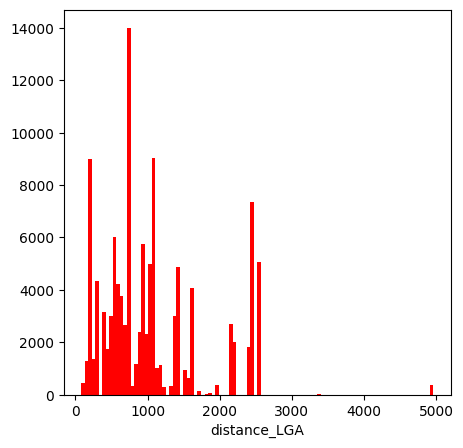

In [218]:
# Khuynh hướng tập trung
fig, ax = plt.subplots(figsize = [5,5])
ax.hist(distance_LGA, bins = 100, color = 'r')
ax.set_xlabel('distance_LGA')
plt.show()

In [219]:
# Outlier
print(distance_LGA[(distance_LGA < lowerquartile)])
print(distance_LGA[(distance_LGA > upperquartile)])

[]
[4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963
 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963
 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963
 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963
 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963
 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963
 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963
 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963
 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963
 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963
 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963
 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963
 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963
 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963 4963
 49

In [220]:
distance_LGA_new = distance_LGA[(distance_LGA > lowerquartile) & (distance_LGA < upperquartile)]
print(distance_LGA_new)

[1400  719 1065 ...  209  872 2565]


In [221]:
#mean, median, mode của distance_LGA_new
mean = np.mean(distance_LGA_new)
median = np.median(distance_LGA_new)
h = np.histogram(distance_LGA_new, bins = 20)
counts, bins = h
mode_idx = np.argmax(counts)
mode = np.mean([bins[mode_idx], bins[mode_idx + 1]])
print(f'Mean: {mean}')
print(f'Median: {median}')
print(f'Mode: {mode}')

Mean: 1052.6083418979103
Median: 872.0
Mode: 763.375


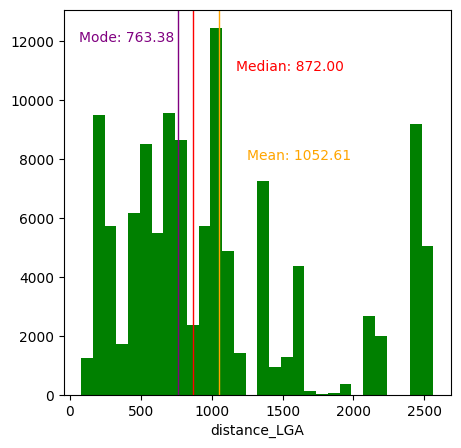

In [222]:
fig, ax = plt.subplots(figsize = [5,5])
ax.hist(distance_LGA_new, bins = 30, color = 'g')
ax.set_xlabel('distance_LGA')

ax.axvline(mean, color = 'orange', ls = '-', lw = 1)
ax.text(mean + 200, 8000, f'Mean: {mean:.2f}', color = 'orange')

ax.axvline(median, color = 'red', ls = '-', lw = 1)
ax.text(median + 300, 11000, f'Median: {median:.2f}', color = 'red')

ax.axvline(mode, color = 'purple', ls = '-', lw = 1)
ax.text(mode - 700, 12000, f'Mode: {mode:.2f}', color = 'purple')

plt.show()

In [223]:
# Dạng phân bố
skew = stats.skew(distance_LGA_new)
kurtosis = stats.kurtosis(distance_LGA_new)
print(f'skew: {skew}')
print(f'kurtosis: {kurtosis}')

skew: 0.9064112011479569
kurtosis: -0.2273509141952843


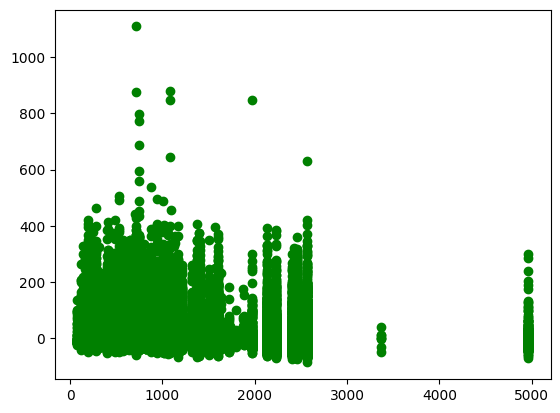

In [224]:
# Tương quan với cột arr_delay
plt.scatter(distance_LGA, arr_delay_LGA, color = 'g')
plt.show()

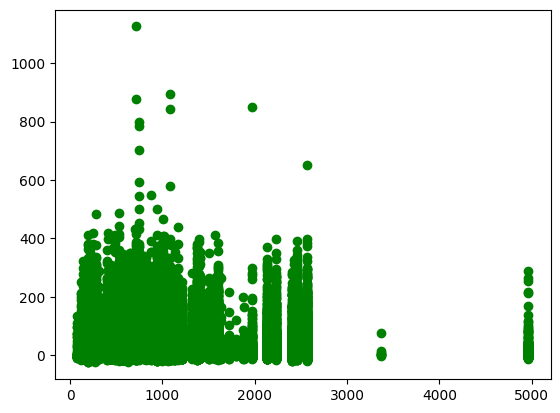

In [225]:
# Tương quan với cột dep_delay
plt.scatter(distance_LGA, dep_delay_LGA, color = 'g')
plt.show()

In [226]:
cov1 = np.cov(distance_LGA, arr_delay_LGA)
print(cov1)
cov2 = np.cov(distance_LGA, dep_delay_LGA)
print(cov2)

[[538205.01488901  -2790.44891327]
 [ -2790.44891327   2072.90653348]]
[[538205.01488901  -1102.50884997]
 [ -1102.50884997   1696.22136229]]


In [227]:
corr1 = np.corrcoef(distance_LGA, arr_delay_LGA)
print(corr1)
corr2 = np.corrcoef(distance_LGA, dep_delay_LGA)
print(corr2)

[[ 1.         -0.08354305]
 [-0.08354305  1.        ]]
[[ 1.         -0.03648942]
 [-0.03648942  1.        ]]


# Mô hình linear regression dự đoán thời gian đến trễ dựa vào thời gian xuất phát và khoảng cách đối với sân bay LGA

In [228]:
# Tứ phân vị
q1_dep_delay_LGA = np.quantile(dep_delay_LGA, 0.25)
q2_dep_delay_LGA =  np.quantile(dep_delay_LGA, 0.5)
q3_dep_delay_LGA =  np.quantile(dep_delay_LGA, 0.75)
iqr_dep_delay_LGA = q3_dep_delay_LGA - q1_dep_delay_LGA
lowerquartile_dep_delay_LGA = q1_dep_delay_LGA - 1.5 * iqr_dep_delay_LGA
upperquartile_dep_delay_LGA = q3_dep_delay_LGA + 1.5 * iqr_dep_delay_LGA

q1_arr_delay_LGA = np.quantile(arr_delay_LGA, 0.25)
q2_arr_delay_LGA =  np.quantile(arr_delay_LGA, 0.5)
q3_arr_delay_LGA =  np.quantile(arr_delay_LGA, 0.75)
iqr_arr_delay_LGA = q3_arr_delay_LGA - q1_arr_delay_LGA
lowerquartile_arr_delay_LGA = q1_arr_delay_LGA - 1.5 * iqr_arr_delay_LGA
upperquartile_arr_delay_LGA = q3_arr_delay_LGA + 1.5 * iqr_arr_delay_LGA

q1_distance_LGA = np.quantile(distance_LGA, 0.25)
q2_distance_LGA =  np.quantile(distance_LGA, 0.5)
q3_distance_LGA =  np.quantile(distance_LGA, 0.75)
iqr_distance_LGA = q3_distance_LGA - q1_distance_LGA
lowerquartile_distance_LGA = q1_distance_LGA - 1.5 * iqr_distance_LGA
upperquartile_distance_LGA = q3_distance_LGA + 1.5 * iqr_distance_LGA


In [229]:
upperquartile_dep_delay_LGA

43.5

In [230]:
# Xử lý outlier
fdata_LGA_new = fdata_LGA[(fdata_LGA['dep_delay'] > lowerquartile_dep_delay_LGA) & (fdata_LGA['dep_delay'] < upperquartile_dep_delay_LGA)]
fdata_LGA_new = fdata_LGA_new[(fdata_LGA_new['arr_delay'] > lowerquartile_arr_delay_LGA) & (fdata_LGA_new['arr_delay'] < upperquartile_arr_delay_LGA)]
fdata_LGA_new = fdata_LGA_new[(fdata_LGA_new['distance'] > lowerquartile_distance_LGA) & (fdata_LGA_new['distance'] < upperquartile_distance_LGA)]
fdata_LGA_final = fdata_LGA_new[['dep_delay', 'distance', 'arr_delay']]
fdata_LGA_final.reset_index(inplace = True, drop = True)
display(fdata_LGA_final)

,dep_delay,distance,arr_delay
0,4.0,1416,20.0
1,-6.0,762,-25.0
2,-3.0,229,-14.0
3,-2.0,733,8.0
4,-1.0,1389,31.0
...,...,...,...
90401,-2.0,305,-24.0
90402,30.0,292,-2.0
90403,10.0,1076,3.0
90404,-2.0,378,8.0


In [231]:
a = fdata_LGA_final['dep_delay'].values; b = fdata_LGA_final['arr_delay'].values
corr = np.corrcoef(a, b)
print(corr)
from scipy import stats
kq = stats.linregress(a, b)
print(kq)

[[1.         0.55674511]
 [0.55674511 1.        ]]
LinregressResult(slope=0.9879837605887297, intercept=-5.262063168276691, rvalue=0.556745113320348, pvalue=0.0, stderr=0.004902697420142549, intercept_stderr=0.05225652468857882)


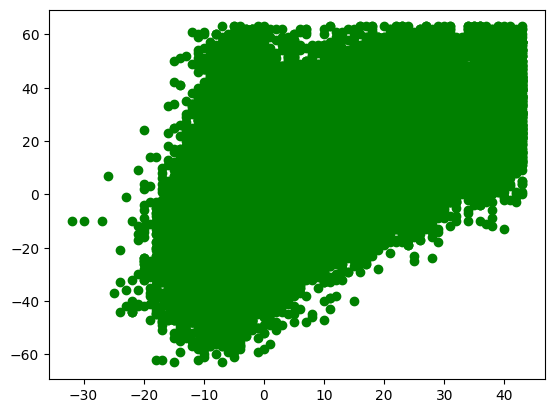

In [232]:
# Tương quan với cột dep_delay
plt.scatter(a, b, color = 'g')
plt.show()

In [233]:
fdata_LGA_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90406 entries, 0 to 90405
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   dep_delay  90406 non-null  float64
 1   distance   90406 non-null  int64  
 2   arr_delay  90406 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 2.1 MB


In [234]:
# Xử lý cột dep_delay
dep_delay_LGA = fdata_LGA_final['dep_delay'].values
mean_dep_delay_LGA = np.mean(dep_delay_LGA)
std_dep_delay_LGA = np.std(dep_delay_LGA)
print(f'mean_dep_delay_LGA: {round(mean_dep_delay_LGA,2)}, \nstd_dep_delay_LGA: {round(std_dep_delay_LGA,2)}')
dep_delay_LGA_standardize = (dep_delay_LGA - mean_dep_delay_LGA) / std_dep_delay_LGA
print(f'dep_delay_LGA_standardize: {dep_delay_LGA_standardize}')

# Xử lý cột distance
distance_LGA = fdata_LGA_final['distance'].values
mean_distance_LGA = np.mean(distance_LGA)
std_distance_LGA = np.std(distance_LGA)
print(f'mean_distance_LGA: {round(mean_distance_LGA,2)}, \nstd_distance_LGA: {round(std_distance_LGA,2)}')
distance_LGA_standardize = (distance_LGA - mean_distance_LGA) / std_distance_LGA
print(f'distance_LGA_standardize: {distance_LGA_standardize}')

mean_dep_delay_LGA: -0.27, 
std_dep_delay_LGA: 10.66
dep_delay_LGA_standardize: [ 0.40089375 -0.53760919 -0.25605831 ...  0.96399552 -0.16220801
  2.55945052]
mean_distance_LGA: 786.41, 
std_distance_LGA: 372.89
distance_LGA_standardize: [ 1.68839239 -0.06545357 -1.49481122 ...  0.77660702 -1.09523469
 -0.06009013]


In [235]:
# thông số sau chuẩn hóa
# Chuẩn hóa cột dep_delay bằng standardscaler
mean_dep_delay_LGA_standardize = round(np.mean(dep_delay_LGA_standardize),2)
median_dep_delay_LGA_standardize = round(np.median(dep_delay_LGA_standardize),2)
min_dep_delay_LGA_standardize = round(np.min(dep_delay_LGA_standardize),2)
max_dep_delay_LGA_standardize = round(np.max(dep_delay_LGA_standardize),2)
ptp_dep_delay_LGA_standardize = round(np.ptp(dep_delay_LGA_standardize),2)
var_dep_delay_LGA_standardize = round(np.var(dep_delay_LGA_standardize),2)
std_dep_delay_LGA_standardize = round(np.std(dep_delay_LGA_standardize),2)
unique_dep_delay_LGA_standardize = len(np.unique(dep_delay_LGA_standardize))
count_dep_delay_LGA_standardize = len(dep_delay_LGA_standardize)
print(f'mean_dep_delay_LGA_standardize: {mean_dep_delay_LGA_standardize}')
print(f'median_dep_delay_LGA_standardize: {median_dep_delay_LGA_standardize}')
print(f'min_dep_delay_LGA_standardize: {min_dep_delay_LGA_standardize}')
print(f'max_dep_delay_LGA_standardize: {max_dep_delay_LGA_standardize}')
print(f'ptp_dep_delay_LGA_standardize: {ptp_dep_delay_LGA_standardize}')
print(f'var_dep_delay_LGA_standardize: {var_dep_delay_LGA_standardize}')
print(f'std_dep_delay_LGA_standardize: {std_dep_delay_LGA_standardize}')
print(f'unique_dep_delay_LGA_standardize: {unique_dep_delay_LGA_standardize}')
print(f'count_dep_delay_LGA_standardize: {count_dep_delay_LGA_standardize}')

print('+=' * 20)

# Chuẩn hóa cột distance bằng standardscaler
mean_distance_LGA_standardize = round(np.mean(distance_LGA_standardize),2)
median_distance_LGA_standardize = round(np.median(distance_LGA_standardize),2)
min_distance_LGA_standardize = round(np.min(distance_LGA_standardize),2)
max_distance_LGA_standardize = round(np.max(distance_LGA_standardize),2)
ptp_distance_LGA_standardize = round(np.ptp(distance_LGA_standardize),2)
var_distance_LGA_standardize = round(np.var(distance_LGA_standardize),2)
std_distance_LGA_standardize = round(np.std(distance_LGA_standardize),2)
unique_distance_LGA_standardize = len(np.unique(distance_LGA_standardize))
count_distance_LGA_standardize = len(distance_LGA_standardize)
print(f'mean_distance_LGA_standardize: {mean_distance_LGA_standardize}')
print(f'median_distance_LGA_standardize: {median_distance_LGA_standardize}')
print(f'min_distance_LGA_standardize: {min_distance_LGA_standardize}')
print(f'max_distance_LGA_standardize: {max_distance_LGA_standardize}')
print(f'ptp_distance_LGA_standardize: {ptp_distance_LGA_standardize}')
print(f'var_distance_LGA_standardize: {var_distance_LGA_standardize}')
print(f'std_distance_LGA_standardize: {std_distance_LGA_standardize}')
print(f'unique_distance_LGA_standardize: {unique_distance_LGA_standardize}')
print(f'count_distance_LGA_standardize: {count_distance_LGA_standardize}')

mean_dep_delay_LGA_standardize: -0.0
median_dep_delay_LGA_standardize: -0.35
min_dep_delay_LGA_standardize: -2.98
max_dep_delay_LGA_standardize: 4.06
ptp_dep_delay_LGA_standardize: 7.04
var_dep_delay_LGA_standardize: 1.0
std_dep_delay_LGA_standardize: 1.0
unique_dep_delay_LGA_standardize: 73
count_dep_delay_LGA_standardize: 90406
+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=
mean_distance_LGA_standardize: 0.0
median_distance_LGA_standardize: -0.07
min_distance_LGA_standardize: -1.85
max_distance_LGA_standardize: 2.24
ptp_distance_LGA_standardize: 4.09
var_distance_LGA_standardize: 1.0
std_distance_LGA_standardize: 1.0
unique_distance_LGA_standardize: 67
count_distance_LGA_standardize: 90406


In [236]:
dep_delay_LGA_standardize = pd.Series(dep_delay_LGA_standardize)
distance_LGA_standardize = pd.Series(distance_LGA_standardize)
fdata_LGA_final['dep_delay_LGA_standardize'] = dep_delay_LGA_standardize
fdata_LGA_final['distance_LGA_standardize'] = distance_LGA_standardize

In [237]:
fdatafinal_LGA_standardize = fdata_LGA_final
display(fdatafinal_LGA_standardize)

,dep_delay,distance,arr_delay,dep_delay_LGA_standardize,distance_LGA_standardize
0,4.0,1416,20.0,0.400894,1.688392
1,-6.0,762,-25.0,-0.537609,-0.065454
2,-3.0,229,-14.0,-0.256058,-1.494811
3,-2.0,733,8.0,-0.162208,-0.143224
4,-1.0,1389,31.0,-0.068358,1.615986
...,...,...,...,...,...
90401,-2.0,305,-24.0,-0.162208,-1.291000
90402,30.0,292,-2.0,2.841001,-1.325863
90403,10.0,1076,3.0,0.963996,0.776607
90404,-2.0,378,8.0,-0.162208,-1.095235


In [238]:
X = fdatafinal_LGA_standardize[['dep_delay_LGA_standardize', 'distance_LGA_standardize']].values
Y = fdatafinal_LGA_standardize['arr_delay'].values
print(X)
print(Y)

[[ 0.40089375  1.68839239]
 [-0.53760919 -0.06545357]
 [-0.25605831 -1.49481122]
 ...
 [ 0.96399552  0.77660702]
 [-0.16220801 -1.09523469]
 [ 2.55945052 -0.06009013]]
[ 20. -25. -14. ...   3.   8.   7.]


In [239]:
np.random.seed(3)
rand_indices = np.arange(fdatafinal_LGA_standardize.index.values[-1] + 1)
np.random.shuffle(rand_indices) #xáo trộn trước khi phân ra 2 tập train và test

print(rand_indices.size)
print(rand_indices)

90406
[27620 53537 86200 ... 77049 67224 71530]


In [240]:
N_TRAIN = round(0.7*len(rand_indices))
train_indices = rand_indices[0:N_TRAIN]
test_indices = rand_indices[N_TRAIN:]
print(test_indices)
print(len(test_indices))
print(train_indices)
print(len(train_indices))

[56309  5363 29633 ... 77049 67224 71530]
27122
[27620 53537 86200 ... 16144 23872 32049]
63284


In [241]:
x_train, y_train = X[train_indices], Y[train_indices]
print(x_train.shape, y_train.shape)

(63284, 2) (63284,)


In [242]:
x_test, y_test = X[test_indices], Y[test_indices]
print(x_test.shape, y_test.shape)

(27122, 2) (27122,)


In [243]:
model = LinearRegression()
model.fit(x_train, y_train)
a = model.coef_
b = model.intercept_
s = x_train[3]
y0_predict1 = np.sum(s*a) + b
print(a)
print(b)
print(y0_predict1)

[10.61203803 -1.18087834]
-5.564526278429139
-10.502003186936534


In [244]:
y_hat = model.predict(x_test)
print(y_hat.shape)
print(y_hat)

(27122,)
[-12.49388897 -11.25412673  21.46793479 ... -12.18673388  -2.1370399
  -9.52189423]


In [245]:
r2 = model.score(x_train, y_train)
print(f'r2: {r2}')
q2 = model.score(x_test, y_test)
print(f'q2: {q2}') 

r2: 0.31600085108594445
q2: 0.30986314887643795


In [246]:
err = y_hat - y_test
rmse = np.sqrt((np.sum((y_test - y_hat)**2))/len(y_test - y_hat))
print(f'y_hat: {y_hat}')
print(f'y_test: {y_test}')
print(f'err: {err}')
print(f'rmse: {rmse}')

y_hat: [-12.49388897 -11.25412673  21.46793479 ... -12.18673388  -2.1370399
  -9.52189423]
y_test: [-21.   4.  11. ...   4. -23. -30.]
err: [  8.50611103 -15.25412673  10.46793479 ... -16.18673388  20.8629601
  20.47810577]
rmse: 15.721939078208646


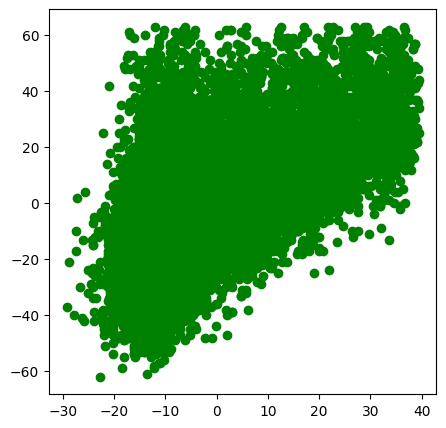

In [247]:
# Scatter plot
plt.figure(figsize=[5,5]) 
plt.scatter(y_hat, y_test, color = 'g') #Nếu kết quả dự đoán hoàn hảo thì biểu đồ scatter
# sẽ nằm trên đường chéo của hình vuông
plt.show()

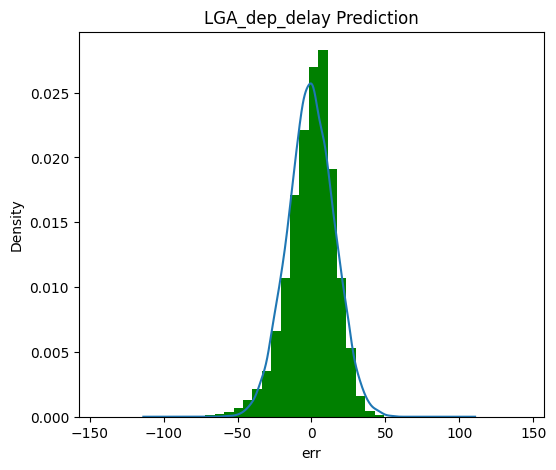

skew: -0.6274848910758593
kurtosis: 0.980172399938521


In [248]:
def plot_error(err, bins=10):
    mean, std = np.mean(err), np.std(err)
    
    plt.figure(figsize=[6,5])    
    plt.title("LGA_dep_delay Prediction")
    plt.xlim([mean - 10*std,mean + 10*std])
    plt.hist(err, density=True, bins=bins, color='g')
    
    norm_dist = np.random.normal(mean, std, 10000)
    pd.Series(norm_dist).plot.kde()
    plt.xlabel('err')
    
    plt.show()
    
    skew = stats.skew(err)
    kurtosis = stats.kurtosis(err)
    print(f'skew: {skew}')
    print(f'kurtosis: {kurtosis}')
plot_error(err, bins=20)

In [249]:
# CI 95%
np.percentile(err, [2.5, 97.5])

array([-36.08698133,  26.90389764])

Mô hình chung và cả 3 mô hình riêng dành cho 3 sân bay JFK, EWR và LGA đều có mức r2 gần bằng 0 là vì biến số distance và
kết quả cần dự đoán là arr_delay không có mối tương quan với nhau. Như vậy để tăng tính chính xác của mô hình cần phải loại
bỏ cột distance ra khỏi mô hình dự đoán. Đặc tính thứ 2 có thể xảy ra là tính chất tuyến tính giữa cột dep_dalay và arr_delay
là do các giá trị outliers ở cột dep_delay. Như vậy để kiểm tra 2 lập luận trên ta chọn sân bay JFK ra để kiểm tra bằng cách loại bỏ cột distance ra khỏi mô hình hồi quy và chỉ thực hiện hồi quy tuyến tính ở các giá trị outliers trên cột dep_delay.

# Sân bay JFK

In [250]:
a = fdata_JFK['dep_delay'].values; b = fdata_JFK['arr_delay'].values
corr = np.corrcoef(a, b)
print(corr)
from scipy import stats
kq = stats.linregress(a, b)
print(kq)

[[1.         0.90193419]
 [0.90193419 1.        ]]
LinregressResult(slope=1.0285431127205826, intercept=-6.815316869650773, rvalue=0.9019341941656127, pvalue=0.0, stderr=0.0014912058534603196, intercept_stderr=0.06061154435271446)


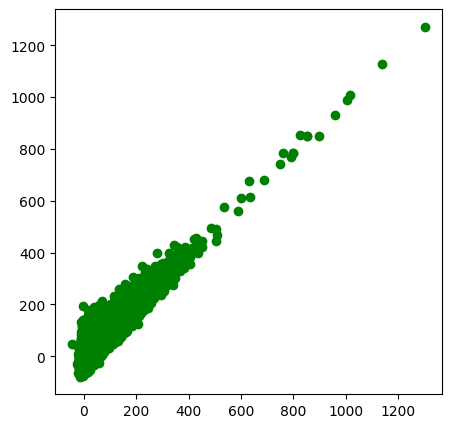

In [251]:
# Scatter plot
plt.figure(figsize=[5,5]) 
plt.scatter(a, b, color = 'g') #Nếu kết quả dự đoán hoàn hảo thì biểu đồ scatter
# sẽ nằm trên đường chéo của hình vuông
plt.show()

In [252]:
a1 = fdata_JFK_final['dep_delay'].values; b1 = fdata_JFK_final['arr_delay'].values
corr = np.corrcoef(a1, b1)
print(corr)
from scipy import stats
kq = stats.linregress(a1, b1)
print(kq)

[[1.         0.45003717]
 [0.45003717 1.        ]]
LinregressResult(slope=0.9763885627078988, intercept=-7.611814335358765, rvalue=0.4500371662116468, pvalue=0.0, stderr=0.0063391573062045944, intercept_stderr=0.05462802512636516)


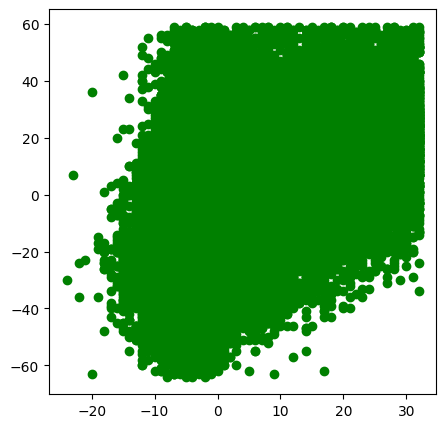

In [253]:
# Scatter plot
plt.figure(figsize=[5,5]) 
plt.scatter(a1, b1, color = 'g') #Nếu kết quả dự đoán hoàn hảo thì biểu đồ scatter
# sẽ nằm trên đường chéo của hình vuông
plt.show()

In [254]:
# lấy outlier
fdata_JFK_new1 = fdata_JFK[(fdata_JFK['dep_delay'] < lowerquartile_dep_delay_JFK) | (fdata_JFK['dep_delay'] > upperquartile_dep_delay_JFK)]
fdata_JFK_final1 = fdata_JFK_new1[['dep_delay', 'distance', 'arr_delay']]
fdata_JFK_final1.reset_index(inplace = True, drop = True)
display(fdata_JFK_final1)

,dep_delay,distance,arr_delay
0,71.0,1089,51.0
1,853.0,184,851.0
2,59.0,1623,16.0
3,77.0,2475,78.0
4,59.0,2465,83.0
...,...,...,...
14435,78.0,2475,40.0
14436,47.0,94,9.0
14437,38.0,184,2.0
14438,194.0,301,194.0


In [255]:
X = fdata_JFK_final1['dep_delay'].values; Y = fdata_JFK_final1['arr_delay'].values
corr = np.corrcoef(X, Y)
print(corr)
from scipy import stats
kq = stats.linregress(X, Y)
print(kq)

[[1.         0.93807283]
 [0.93807283 1.        ]]
LinregressResult(slope=1.0020073251800685, intercept=-3.4000331272194018, rvalue=0.9380728305128978, pvalue=0.0, stderr=0.003079686305066945, intercept_stderr=0.3371099831060239)


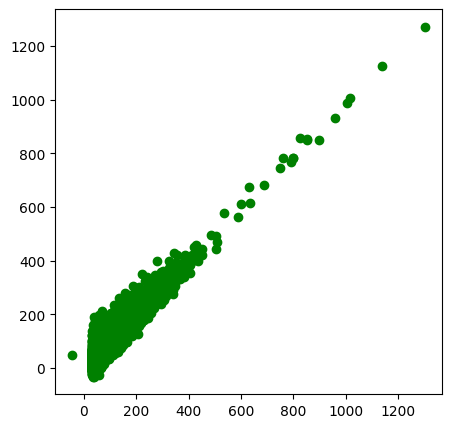

In [256]:
# Scatter plot
plt.figure(figsize=[5,5]) 
plt.scatter(X, Y, color = 'g') #Nếu kết quả dự đoán hoàn hảo thì biểu đồ scatter
# sẽ nằm trên đường chéo của hình vuông
plt.show()

In [257]:
np.random.seed(3)
rand_indices = np.arange(fdata_JFK_final1.index.values[-1] + 1)
np.random.shuffle(rand_indices) #xáo trộn trước khi phân ra 2 tập train và test

print(rand_indices.size)
print(rand_indices)

14440
[ 7424   528 14201 ... 11513  1688  5994]


In [258]:
N_TRAIN = round(0.7*len(rand_indices))
train_indices = rand_indices[0:N_TRAIN]
test_indices = rand_indices[N_TRAIN:]
print(test_indices)
print(len(test_indices))
print(train_indices)
print(len(train_indices))

[ 1595   239  8915 ... 11513  1688  5994]
4332
[ 7424   528 14201 ... 10523  8728  4505]
10108


In [259]:
x_train, y_train = X[train_indices], Y[train_indices]
print(x_train.shape, y_train.shape)

(10108,) (10108,)


In [260]:
x_test, y_test = X[test_indices], Y[test_indices]
print(x_test.shape, y_test.shape)

(4332,) (4332,)


In [261]:
model = LinearRegression()
model.fit(x_train.reshape(-1,1), y_train)
a = model.coef_
b = model.intercept_
s = x_train[3]
y0_predict1 = np.sum(s*a) + b
print(a)
print(b)
print(y0_predict1)

[1.00180196]
-3.451521868546763
61.66560553133348


In [262]:
y_hat = model.predict(x_test.reshape(-1,1))
print(y_hat.shape)
print(y_hat)

(4332,)
[ 36.62055653  29.60794281  29.60794281 ... 113.75930745  38.62416045
 314.11969945]


In [263]:
r2 = model.score(x_train.reshape(-1,1), y_train)
print(f'r2: {r2}')
q2 = model.score(x_test.reshape(-1,1), y_test)
print(f'q2: {q2}') 

r2: 0.8811654002431469
q2: 0.877145303610152


In [264]:
err = y_hat - y_test
rmse = np.sqrt((np.sum((y_test - y_hat)**2))/len(y_test - y_hat))
print(f'y_hat: {y_hat}')
print(f'y_test: {y_test}')
print(f'err: {err}')
print(f'rmse: {rmse}')

y_hat: [ 36.62055653  29.60794281  29.60794281 ... 113.75930745  38.62416045
 314.11969945]
y_test: [ 27.  67.  84. ... 116.  15. 295.]
err: [  9.62055653 -37.39205719 -54.39205719 ...  -2.24069255  23.62416045
  19.11969945]
rmse: 23.92872088170275


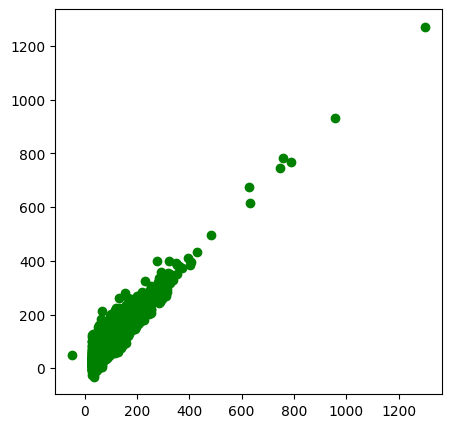

In [265]:
# Scatter plot
plt.figure(figsize=[5,5]) 
plt.scatter(y_hat, y_test, color = 'g') #Nếu kết quả dự đoán hoàn hảo thì biểu đồ scatter
# sẽ nằm trên đường chéo của hình vuông
plt.show()

Một đặc tính của dữ liệu là các hệ số hồi quy tuyến tính khi chưa xử lý outlier giữa cột dep_delay và arr_delay sẽ rất cao
, nhưng khi loại bỏ hết outlier của các biến đưa vào mô hình thì hệ số r2 giảm mạnh từ hơn 0.9 về quanh mức 0.5. Tách riêng
các giá trị của cột dep_delay là outlier ra ngoài cùng với các giá trị arr_delay tương ứng thì hệ số r2 tiệm cận lại ngưỡng
0.9 như tập dữ liệu ban đầu lúc chưa loại bỏ outlier. Như vậy có thể thấy mô hình hồi quy giữa dep_delay và air_delay có
tính chất tuyến tính là nằm ở các biến outlier ở cột dep_delay. Vậy quan hệ tuyến tính giữa cột dep_delay và arr_delay chỉ
xảy ra khi các chuyến bay khởi hành rất trễ hoặc rất sớm thì thời điểm đến sân bay đích cũng sẽ rất trễ hoặc rất sớm, còn nếu 
thời điểm khởi hành không quá trễ hoặc không quá sớm thì thời điểm đến sân bay đích không quá phụ thuộc vào thời điểm khởi
hành.